In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Manhattan12.csv')

In [3]:
data.head()

,Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\r\nMENT\r\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\r\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


<h1 style="color: Red;">Data Cleaning:</h1>

### Showing the shape of the dataset and removing first 4 rows of description

In [4]:
data.shape

(27399, 21)

In [5]:
# Remove Top 4 rows of description
df = data[4:-1]
df.columns = data.iloc[3]
df.reset_index(drop=True, inplace = True)

In [6]:
df.head()

3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\r\nMENT\r\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\r\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


### Rename incorrectly formatted column names 

In [7]:
# Removing ' ', '\n' 
updated_column_names = []
for column in df.columns:
    column = column.replace(" ", "_").replace("\n","").replace('\r',"")
    updated_column_names.append(column)
df.columns = updated_column_names

In [8]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENTNUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALEPRICE,SALE_DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


### Dropping the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'
> #### Borough has same input throughout and ease-ment is empty, these columns don't provide any value

In [9]:
df = df.drop(['BOROUGH', 'EASE-MENT', 'APARTMENTNUMBER'], axis=1)

## Creating a list of categorical and numerical columns
> ### For each numerical column, remove ',' and dollar symbol for the sale price, and then convert other columns to numeric type.

In [10]:
num_columns = ['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALEPRICE', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE']
cat_columns = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'BUILDING_CLASS_AT_TIME_OF_SALE']
for column in num_columns:
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27394 entries, 0 to 27393
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NEIGHBORHOOD                    27394 non-null  object 
 1   BUILDING_CLASS_CATEGORY         27394 non-null  object 
 2   TAX_CLASS_AT_PRESENT            27394 non-null  object 
 3   BLOCK                           27394 non-null  float64
 4   LOT                             27394 non-null  float64
 5   BUILDING_CLASS_AT_PRESENT       27394 non-null  object 
 6   ADDRESS                         27394 non-null  object 
 7   ZIP_CODE                        27394 non-null  float64
 8   RESIDENTIAL_UNITS               27394 non-null  float64
 9   COMMERCIAL_UNITS                27394 non-null  float64
 10  TOTAL_UNITS                     27394 non-null  float64
 11  LAND_SQUARE_FEET                27394 non-null  float64
 12  GROSS_SQUARE_FEET               

In [12]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALEPRICE,SALE_DATE
0,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1306.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,2214693.0,20/05/2013
1,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1307.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1654656.0,16/05/2013
2,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1308.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1069162.0,23/05/2013
3,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1309.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1374637.0,15/05/2013
4,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1310.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1649565.0,13/05/2013


> ### Convert SALE DATE to datetime datatype and split into different columns

In [13]:
df.SALE_DATE = pd.to_datetime(df['SALE_DATE'], format='%d/%m/%Y')

In [14]:
df['SALE_YEAR'] = df.SALE_DATE.dt.year
df['SALE_MONTH'] = df.SALE_DATE.dt.month
df['SALE_DAY'] = df.SALE_DATE.dt.day

In [15]:
df.drop(['SALE_DATE'], axis=1, inplace=True)

In [16]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALEPRICE,SALE_YEAR,SALE_MONTH,SALE_DAY
0,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1306.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,2214693.0,2013,5,20
1,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1307.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1654656.0,2013,5,16
2,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1308.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1069162.0,2013,5,23
3,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1309.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1374637.0,2013,5,15
4,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1310.0,,345 WEST 14TH STREET,10014.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,R4,1649565.0,2013,5,13


> ### For each categorical field, remove the spaces, and then replace the empty string '' by NaN

In [17]:
df[cat_columns] = df[cat_columns].applymap(lambda x: x.strip() if isinstance(x, str) else x)
df[cat_columns] = df[cat_columns].replace('', np.nan)

<h2>Handling NaN values</h2>

In [18]:
df.isna().sum()

NEIGHBORHOOD                        17
BUILDING_CLASS_CATEGORY           3454
TAX_CLASS_AT_PRESENT               143
BLOCK                                0
LOT                                  0
BUILDING_CLASS_AT_PRESENT          143
ADDRESS                              0
ZIP_CODE                             0
RESIDENTIAL_UNITS                    0
COMMERCIAL_UNITS                     0
TOTAL_UNITS                          0
LAND_SQUARE_FEET                     0
GROSS_SQUARE_FEET                    0
YEAR_BUILT                           0
TAX_CLASS_AT_TIME_OF_SALE            0
BUILDING_CLASS_AT_TIME_OF_SALE       0
SALEPRICE                            0
SALE_YEAR                            0
SALE_MONTH                           0
SALE_DAY                             0
dtype: int64

> Dropping Rows with missing values in:
> - BUILDING_CLASS_CATEGORY
> - NEIGHBORHOOD
> - TAX_CLASS_AT_PRESENT
> - BUILDING_CLASS_AT_PRESENT

In [19]:
df.dropna(subset=['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT'], inplace=True)

## Dealing with 0's
> Let's see how many 0' there are:

In [20]:
for col in df.columns:
    print("Count of Zeroes in ", col, "__________________", (df[col] == 0).sum())

Count of Zeroes in  NEIGHBORHOOD __________________ 0
Count of Zeroes in  BUILDING_CLASS_CATEGORY __________________ 0
Count of Zeroes in  TAX_CLASS_AT_PRESENT __________________ 0
Count of Zeroes in  BLOCK __________________ 0
Count of Zeroes in  LOT __________________ 0
Count of Zeroes in  BUILDING_CLASS_AT_PRESENT __________________ 0
Count of Zeroes in  ADDRESS __________________ 0
Count of Zeroes in  ZIP_CODE __________________ 1
Count of Zeroes in  RESIDENTIAL_UNITS __________________ 12795
Count of Zeroes in  COMMERCIAL_UNITS __________________ 20384
Count of Zeroes in  TOTAL_UNITS __________________ 9560
Count of Zeroes in  LAND_SQUARE_FEET __________________ 19329
Count of Zeroes in  GROSS_SQUARE_FEET __________________ 19491
Count of Zeroes in  YEAR_BUILT __________________ 3383
Count of Zeroes in  TAX_CLASS_AT_TIME_OF_SALE __________________ 0
Count of Zeroes in  BUILDING_CLASS_AT_TIME_OF_SALE __________________ 0
Count of Zeroes in  SALEPRICE __________________ 5522
Count o

> Dropping <i>Columns</i> <b>LAND_SQUARE_FEET, GROSS_SQUARE_FEET, COMMERCIAL_UNITS</b> as they have too many zeroes

In [21]:
df.drop(['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'COMMERCIAL_UNITS'], axis=1, inplace = True)

In [22]:
df.shape

(23817, 17)

> ### Save a copy of dataset for improved model

In [23]:
cluster_data = df

> ### Dropping rows with NaN in ZIP_CODE, YEAR_BUILT, SALEPRICE

In [24]:
# Replace with NaN and the drop them
df.ZIP_CODE = df.ZIP_CODE.replace(0, np.nan)
df.YEAR_BUILT = df.YEAR_BUILT.replace(0, np.nan)
df.SALEPRICE = df.SALEPRICE.replace(0, np.nan)

In [25]:
df.isnull().sum()

NEIGHBORHOOD                         0
BUILDING_CLASS_CATEGORY              0
TAX_CLASS_AT_PRESENT                 0
BLOCK                                0
LOT                                  0
BUILDING_CLASS_AT_PRESENT            0
ADDRESS                              0
ZIP_CODE                             1
RESIDENTIAL_UNITS                    0
TOTAL_UNITS                          0
YEAR_BUILT                        3383
TAX_CLASS_AT_TIME_OF_SALE            0
BUILDING_CLASS_AT_TIME_OF_SALE       0
SALEPRICE                         5522
SALE_YEAR                            0
SALE_MONTH                           0
SALE_DAY                             0
dtype: int64

In [26]:
df.dropna(subset=['ZIP_CODE', 'YEAR_BUILT', 'SALEPRICE'], inplace=True)

In [27]:
df.shape

(16021, 17)

In [28]:
df.describe()

,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALEPRICE,SALE_YEAR,SALE_MONTH,SALE_DAY
count,16021.000000,16021.000000,16021.000000,16021.000000,16021.000000,16021.000000,16021.000000,1.602100e+04,16021.000000,16021.000000,16021.000000
mean,1132.181449,510.407216,10029.563573,1.757381,2.123588,1952.163972,2.199363,2.713404e+06,2012.572374,6.920355,16.179140
std,502.814250,788.623987,35.892161,13.135375,13.487108,35.961142,0.646088,2.006263e+07,0.494750,3.361514,8.766552
min,11.000000,1.000000,10001.000000,0.000000,0.000000,1800.000000,1.000000,1.000000e+00,2012.000000,1.000000,1.000000
25%,842.000000,23.000000,10014.000000,0.000000,0.000000,1923.000000,2.000000,4.300000e+05,2012.000000,4.000000,9.000000
50%,1158.000000,45.000000,10021.000000,0.000000,0.000000,1953.000000,2.000000,7.750000e+05,2013.000000,7.000000,16.000000
75%,1452.000000,1070.000000,10028.000000,1.000000,1.000000,1985.000000,2.000000,1.675000e+06,2013.000000,10.000000,24.000000
max,2250.000000,9008.000000,10463.000000,904.000000,904.000000,2013.000000,4.000000,1.307965e+09,2013.000000,12.000000,31.000000


<h2>Encoding Categorical columns</h2>

> Let's see how many <b>distinct</b> values the <b>categorical</b> columns have:

In [29]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print("Distinct values in ", col, "____", df[col].unique().size)

Distinct values in  NEIGHBORHOOD ____ 38
Distinct values in  BUILDING_CLASS_CATEGORY ____ 31
Distinct values in  TAX_CLASS_AT_PRESENT ____ 8
Distinct values in  BUILDING_CLASS_AT_PRESENT ____ 102
Distinct values in  ADDRESS ____ 11079
Distinct values in  BUILDING_CLASS_AT_TIME_OF_SALE ____ 97


> <b>ADDRESS</b> Column has way too many distinct values.... </br>
> Dropping this column for now

In [30]:
df.drop(['ADDRESS'], inplace=True, axis=1)

> Let's <b>Ordinal Encode</b> the rest of the columns.</br>
> Reason being <b>Ordinal Encoding</b> is better for fields with too many distinct values, keeps the number of columns less a.k.a Less dimensions

In [31]:
def Encode(lst):
    return lst.factorize()[0]+1

columns = df.select_dtypes(include=['object']).columns.tolist()
for col in columns:
    df[col] = Encode(df[col])
    print(col, "  ",Encode(df[col]).size)

NEIGHBORHOOD    16021
BUILDING_CLASS_CATEGORY    16021
TAX_CLASS_AT_PRESENT    16021
BUILDING_CLASS_AT_PRESENT    16021
BUILDING_CLASS_AT_TIME_OF_SALE    16021


In [32]:
df.dtypes

NEIGHBORHOOD                        int64
BUILDING_CLASS_CATEGORY             int64
TAX_CLASS_AT_PRESENT                int64
BLOCK                             float64
LOT                               float64
BUILDING_CLASS_AT_PRESENT           int64
ZIP_CODE                          float64
RESIDENTIAL_UNITS                 float64
TOTAL_UNITS                       float64
YEAR_BUILT                        float64
TAX_CLASS_AT_TIME_OF_SALE         float64
BUILDING_CLASS_AT_TIME_OF_SALE      int64
SALEPRICE                         float64
SALE_YEAR                           int64
SALE_MONTH                          int64
SALE_DAY                            int64
dtype: object

In [33]:
df.shape

(16021, 16)

## See if any duplicate rows exist and dropping them

In [34]:
df.shape

(16021, 16)

In [35]:
print("Duplicate rows count:", df.duplicated().sum())

Duplicate rows count: 598


In [36]:
df.drop_duplicates(keep='first' ,inplace=True)

In [37]:
df.shape

(15423, 16)

## Identifying outliers and removing them based on Z-Score

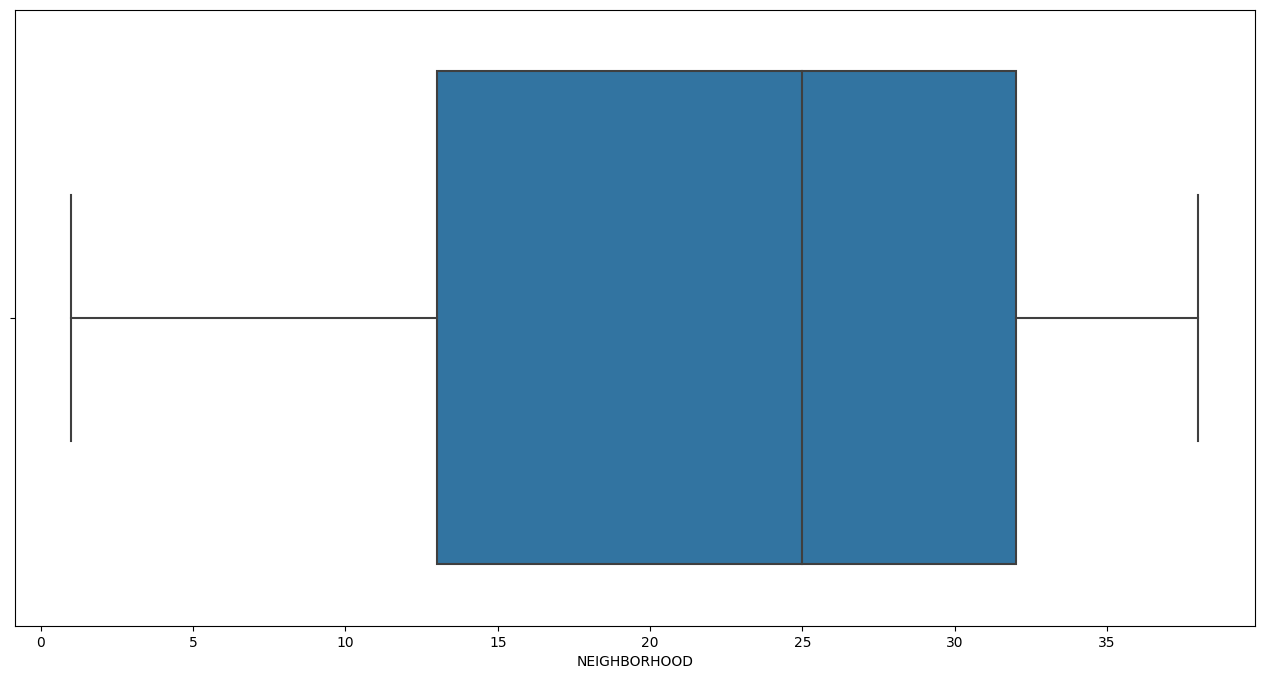

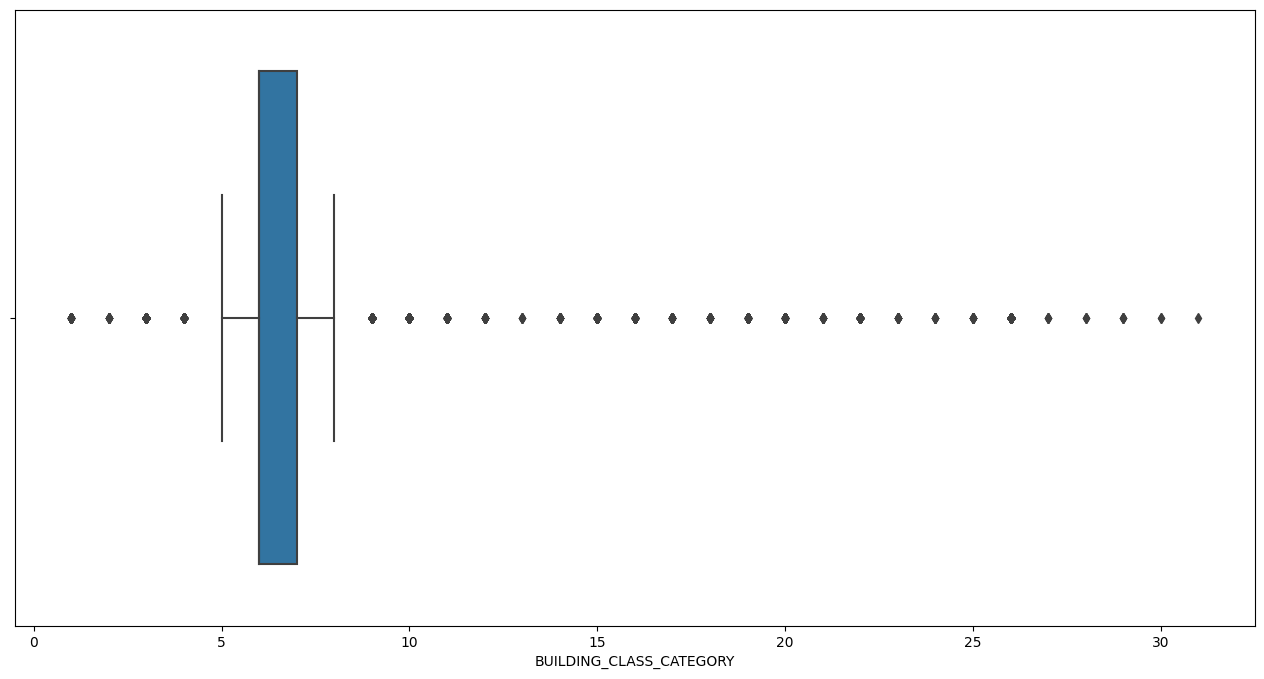

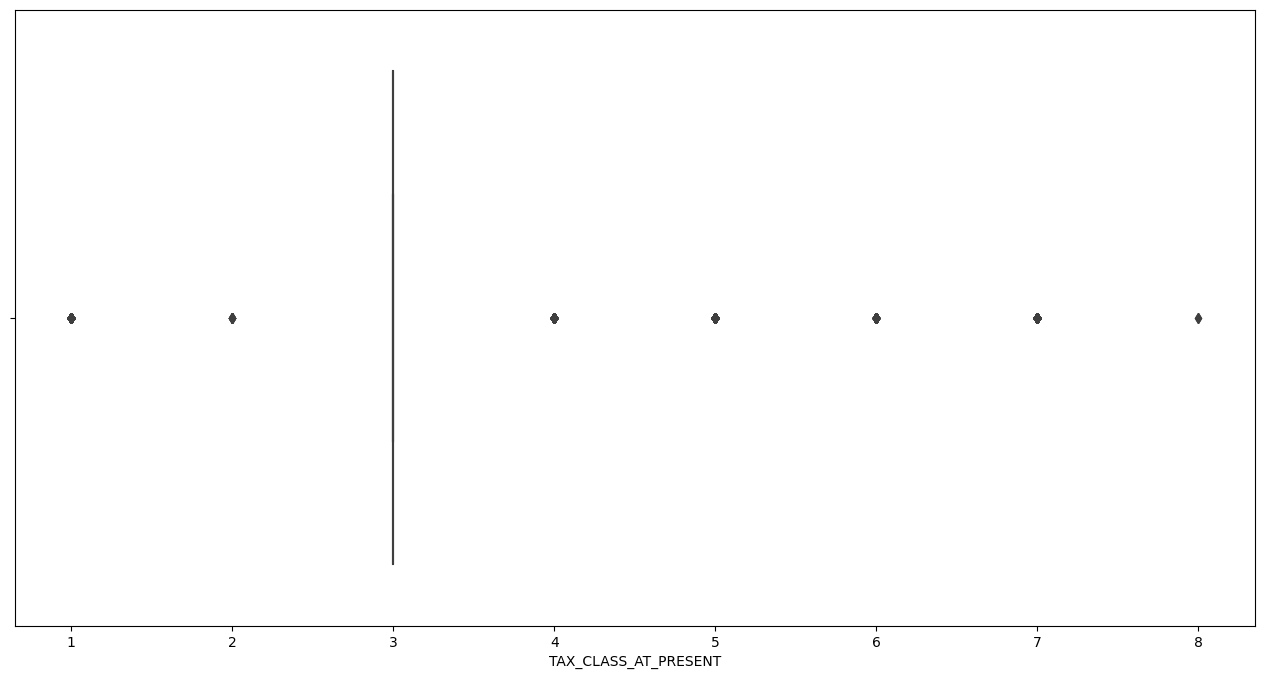

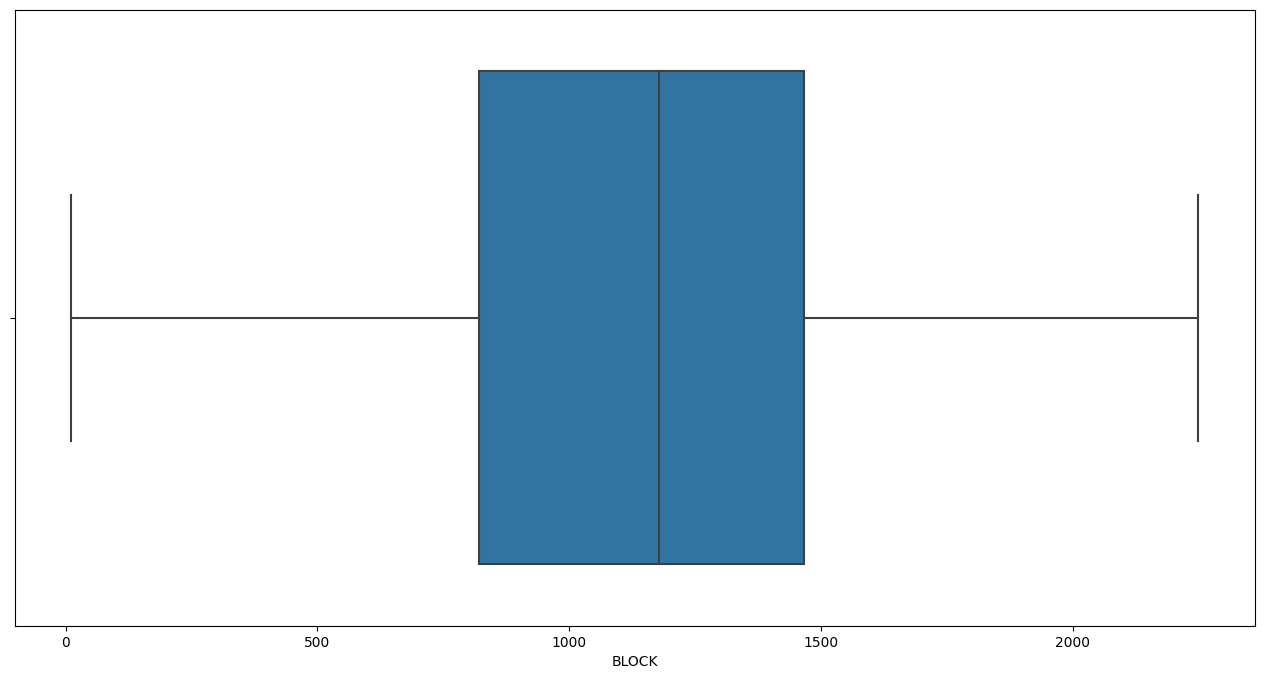

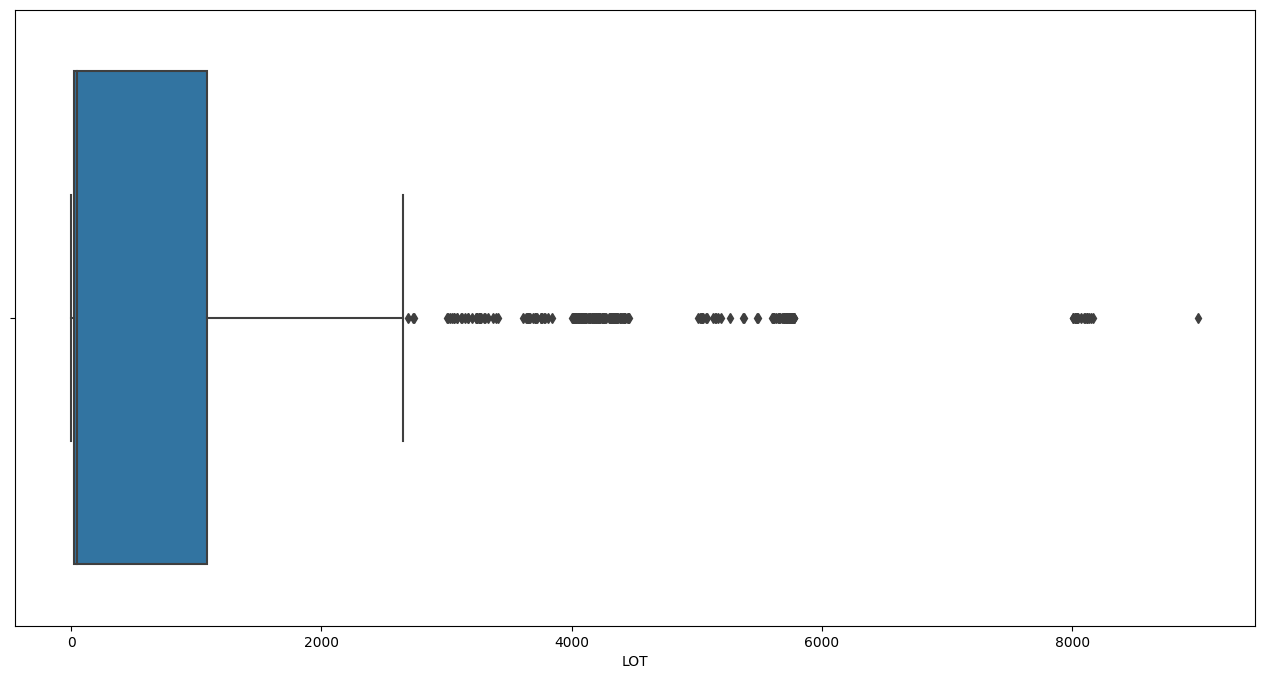

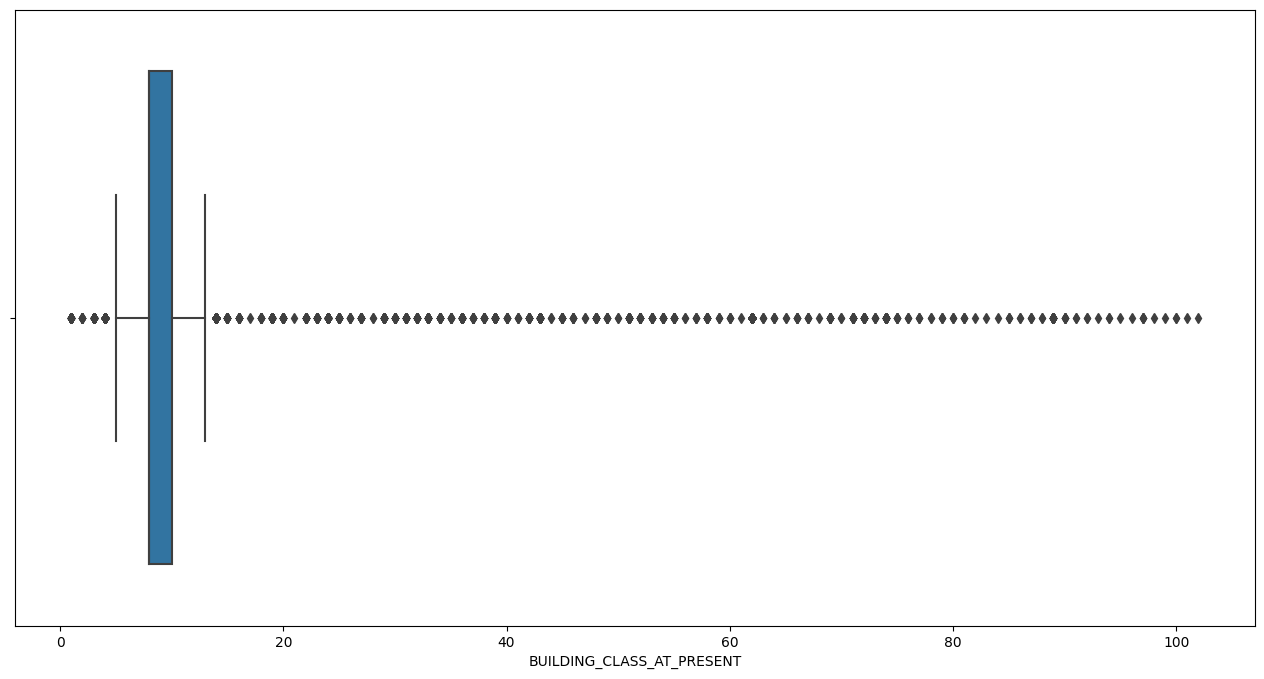

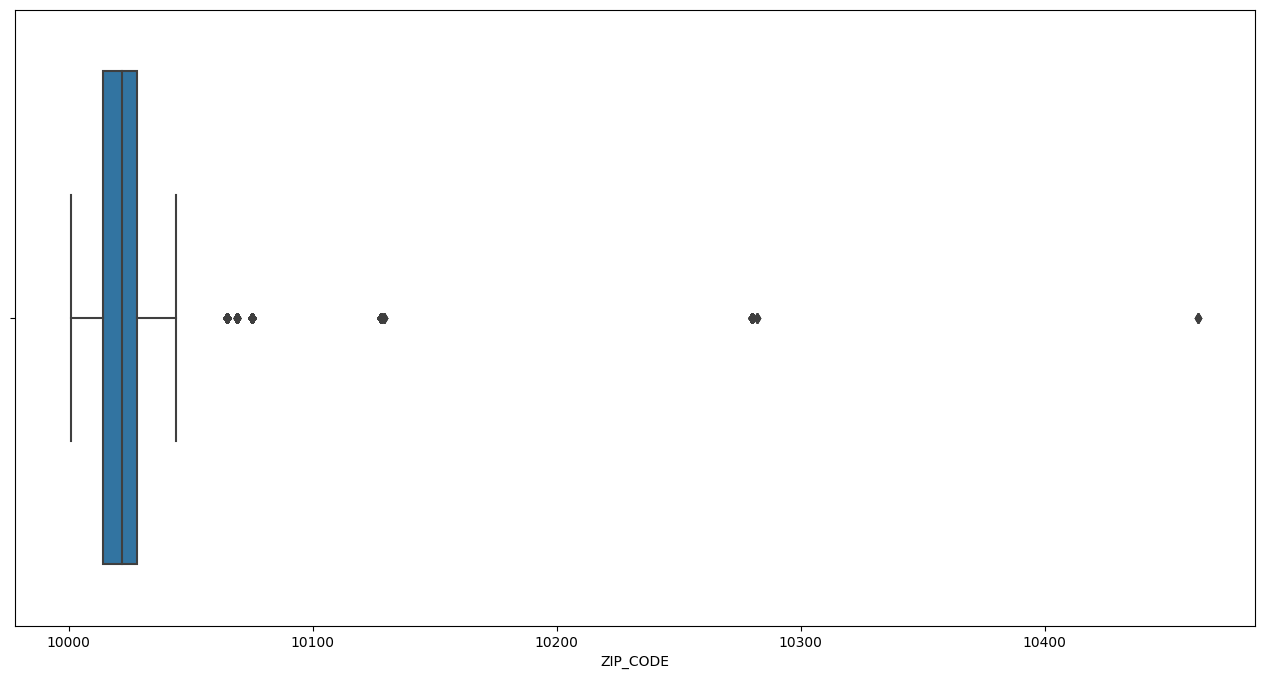

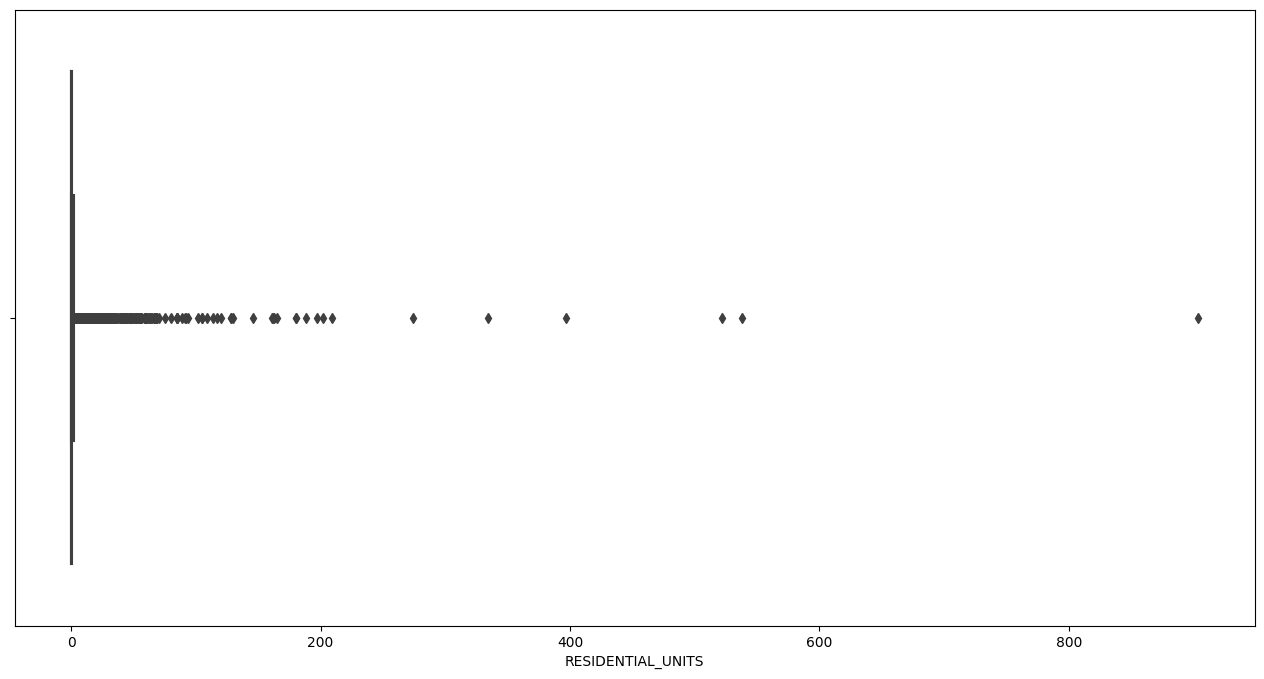

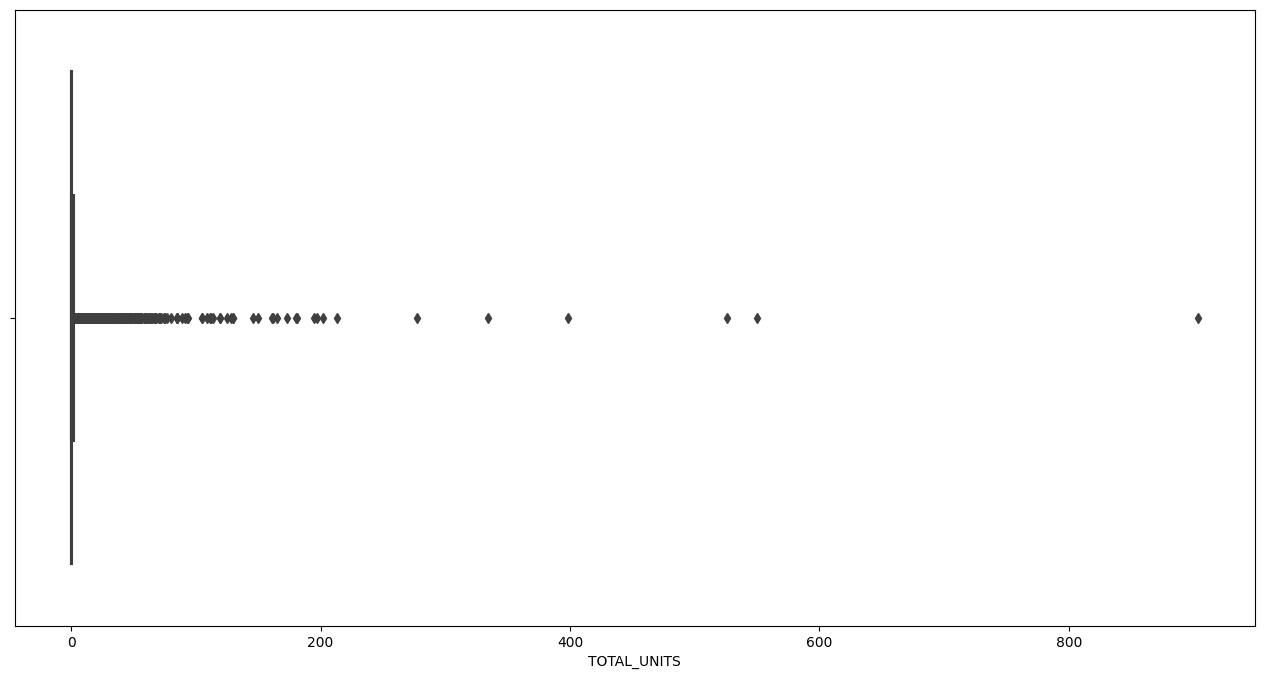

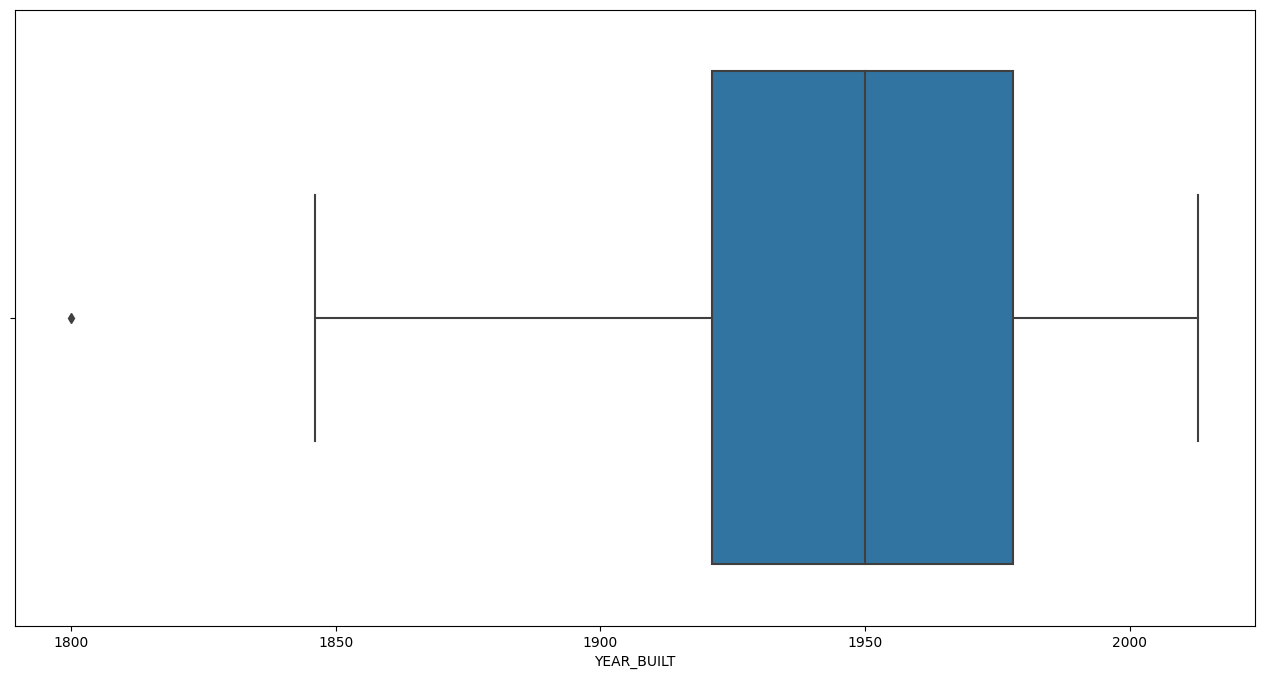

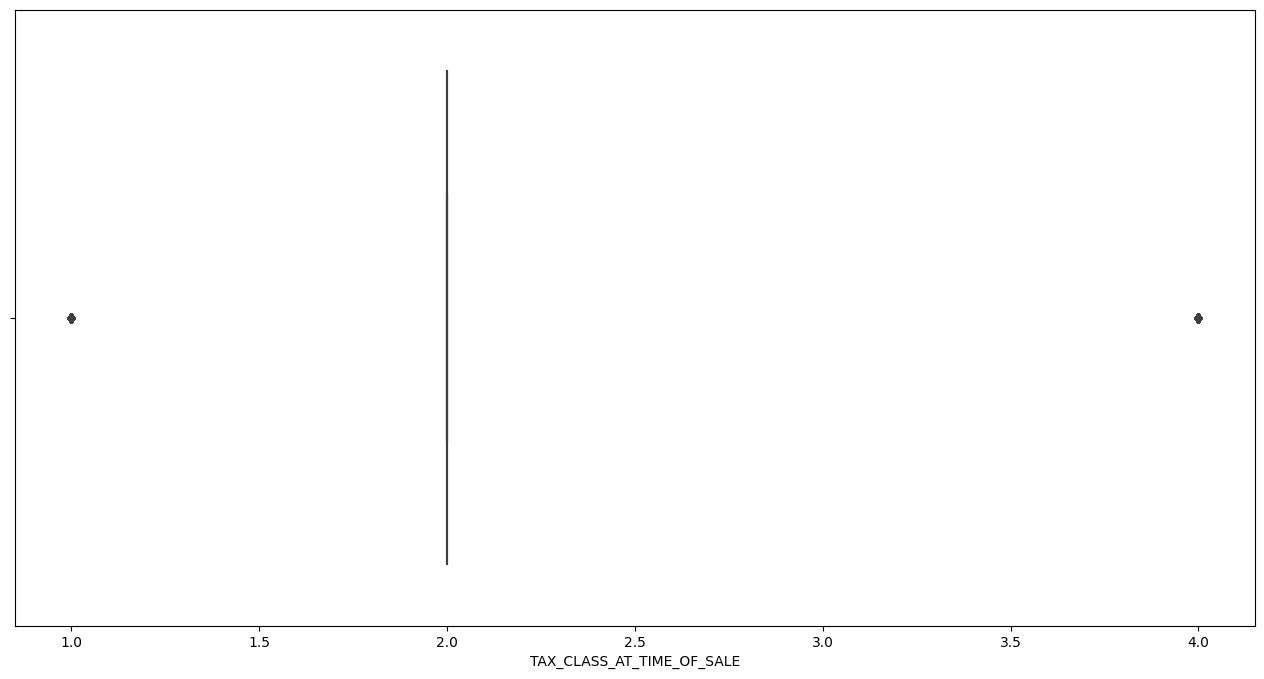

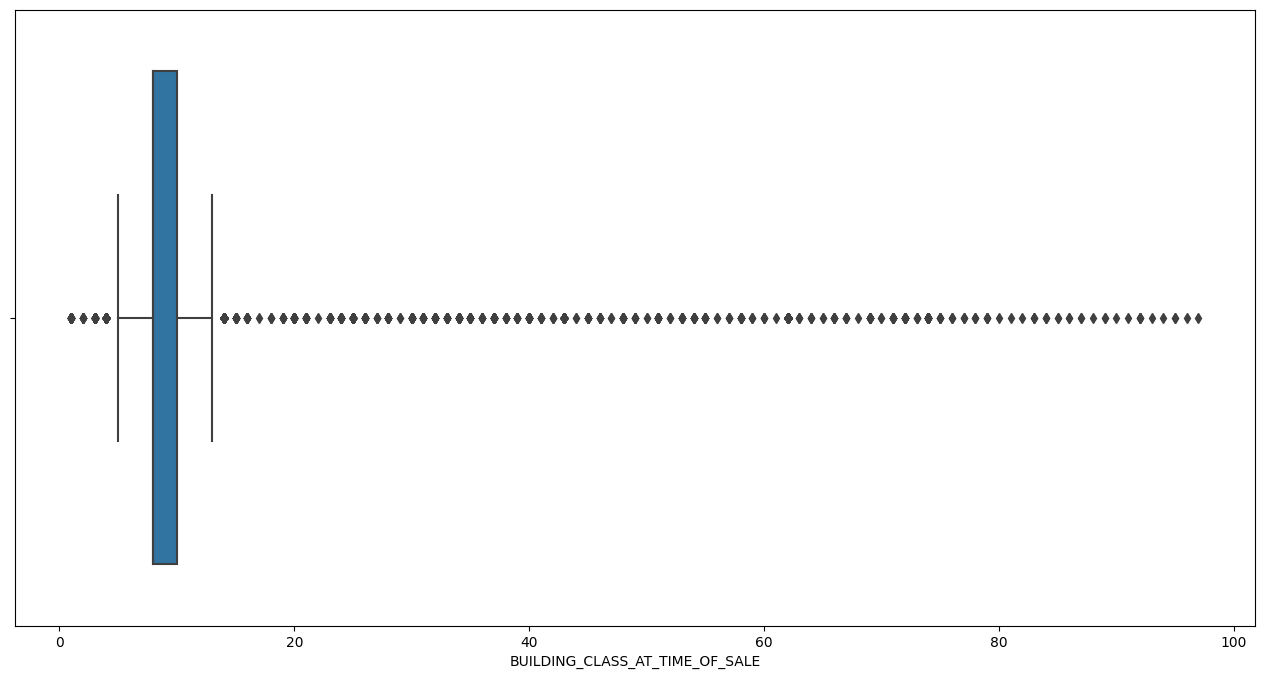

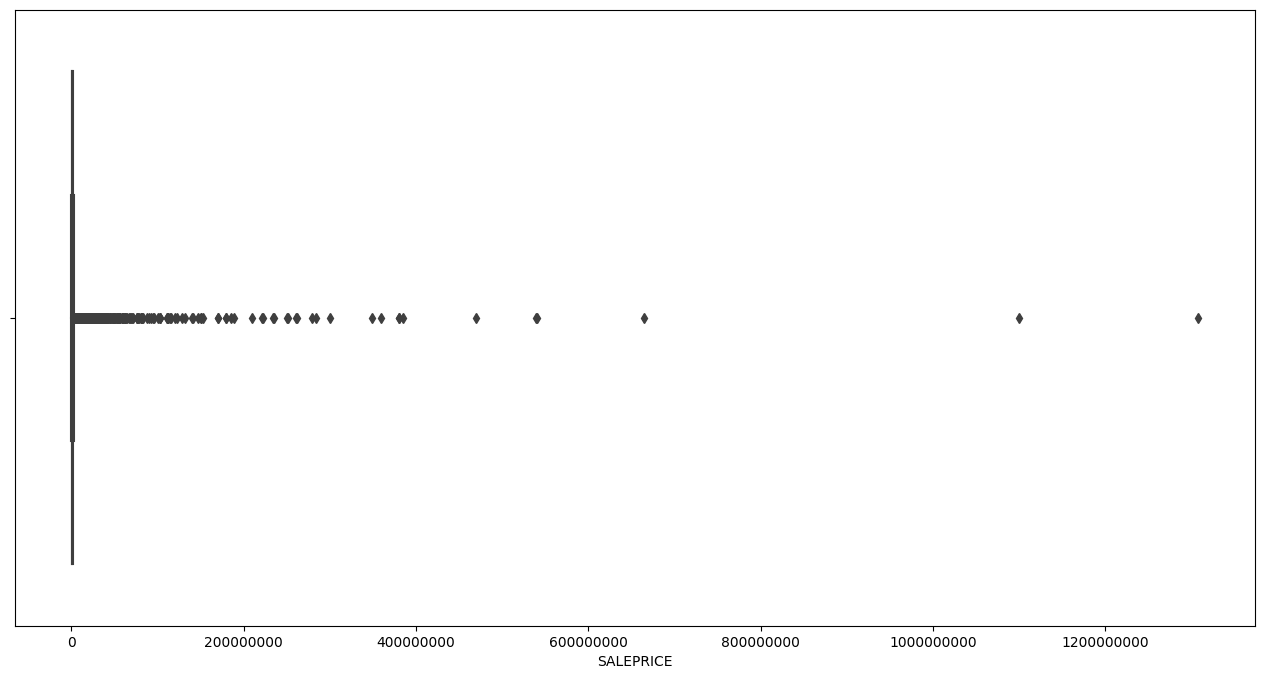

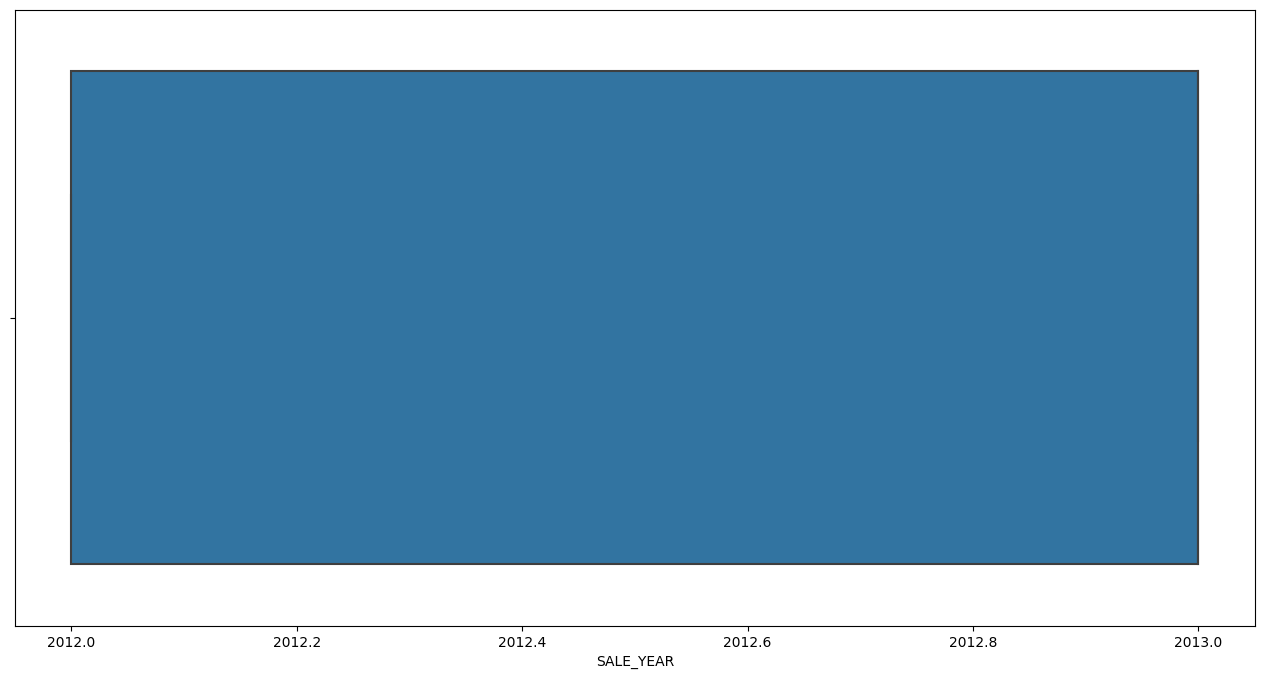

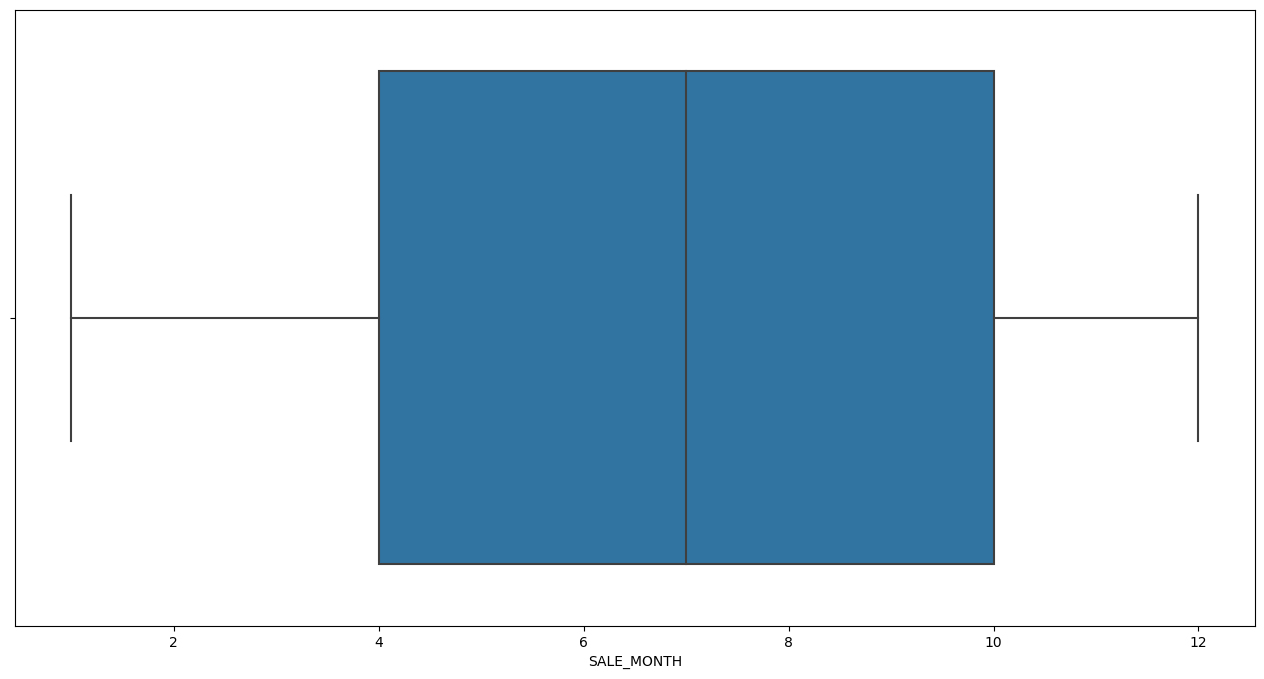

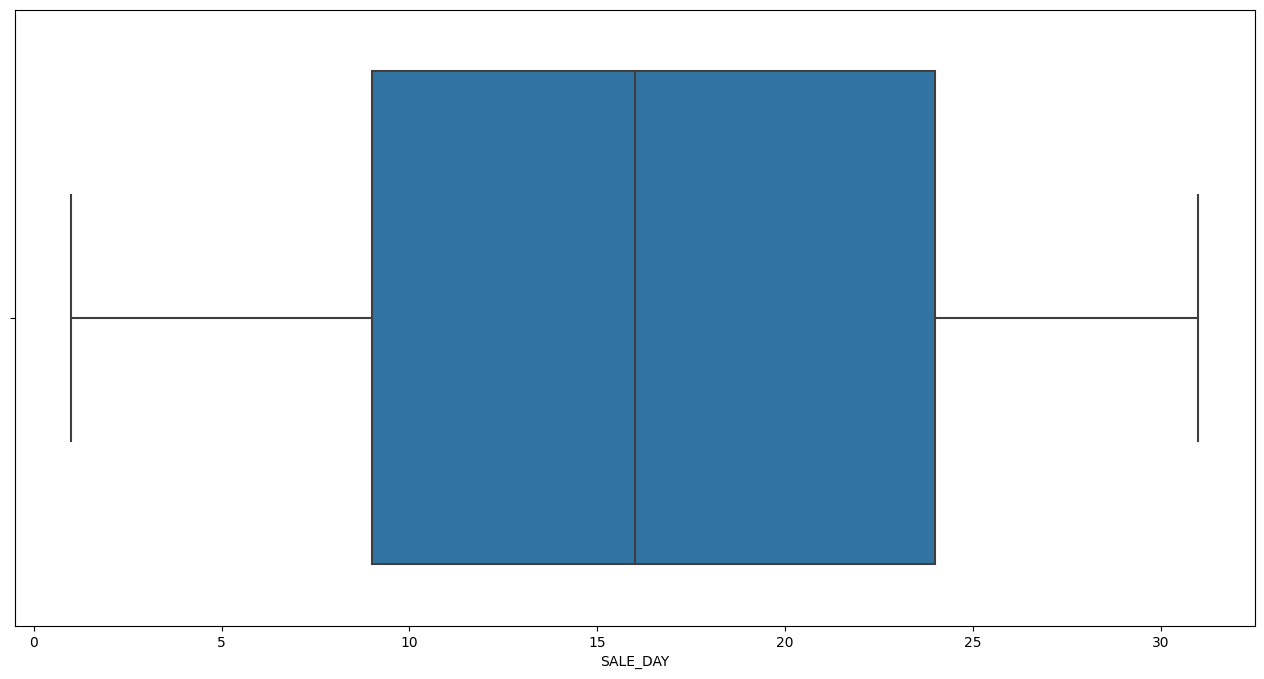

In [38]:
# def boxPlot(lst):
    
for col in df.columns:
    plt.figure(figsize=(16,8))
    plt.ticklabel_format(style='plain', axis='x')
    sns.boxplot(x=col, data=df)
    plt.show()

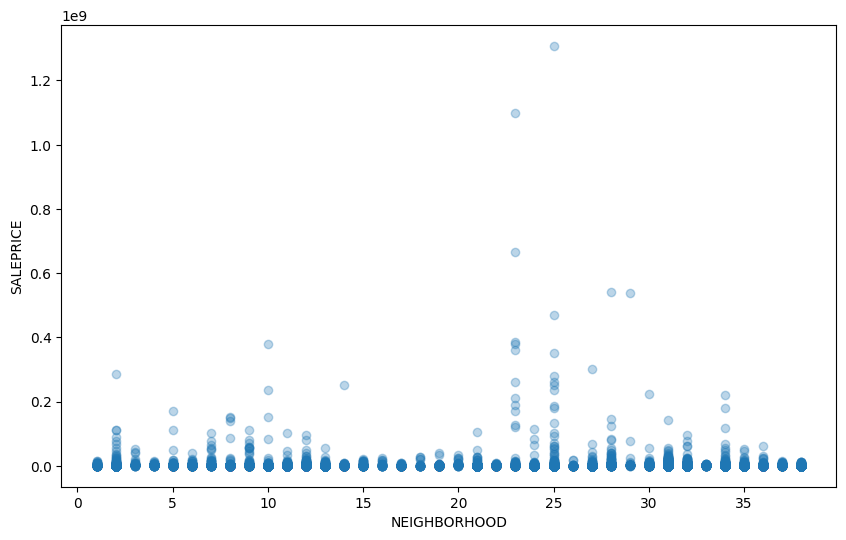

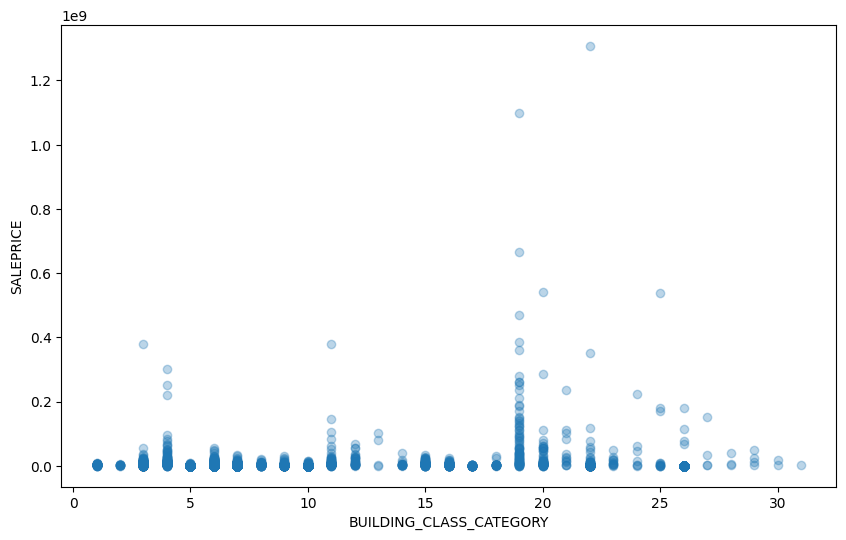

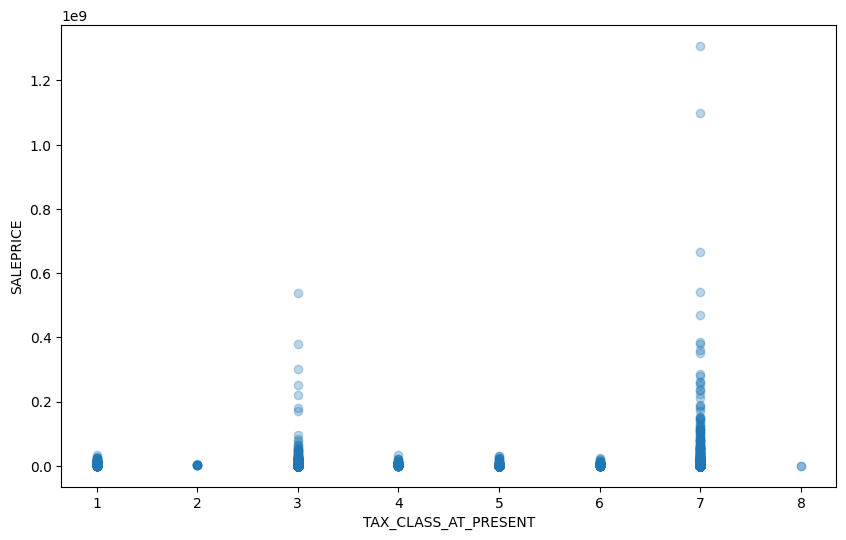

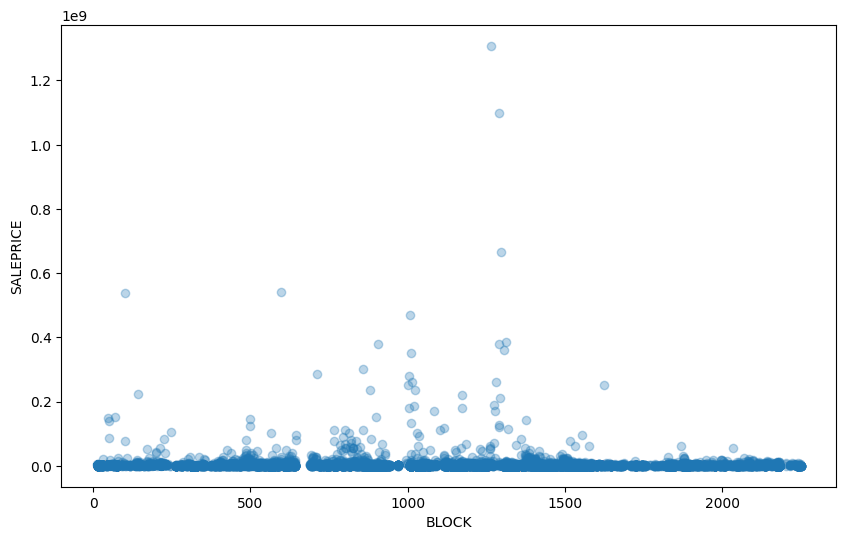

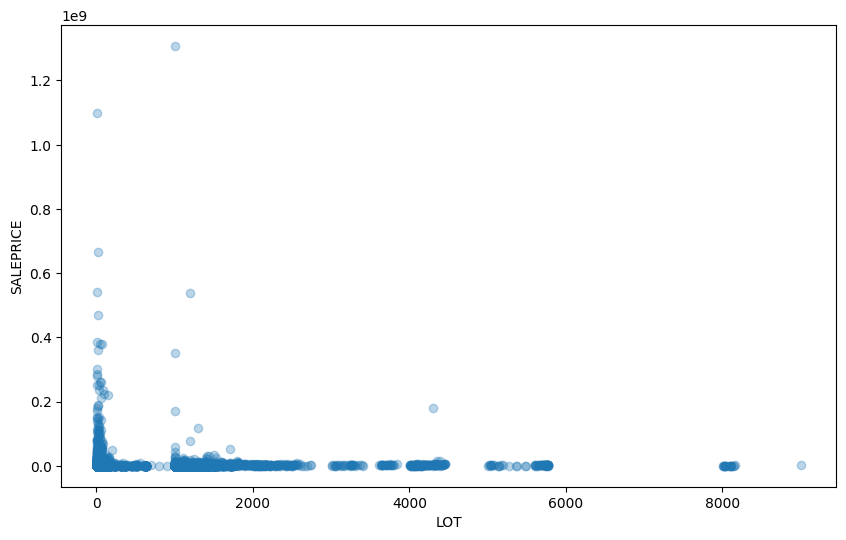

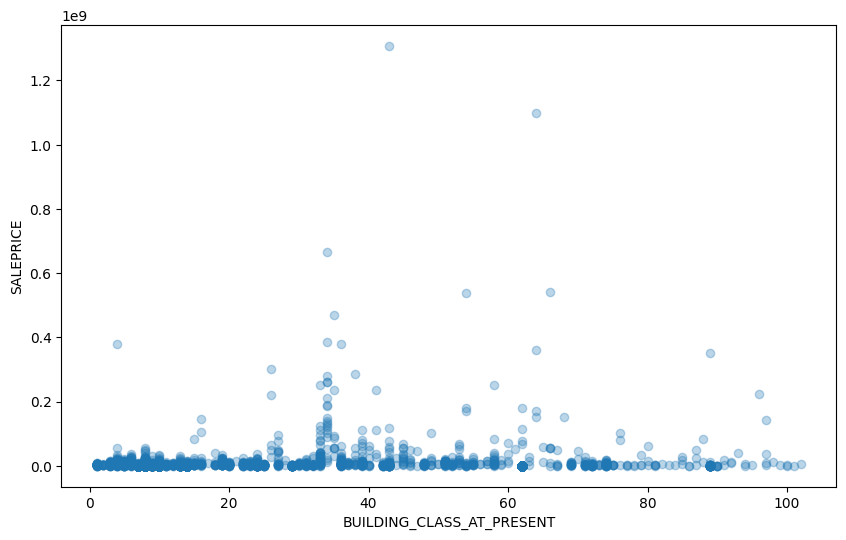

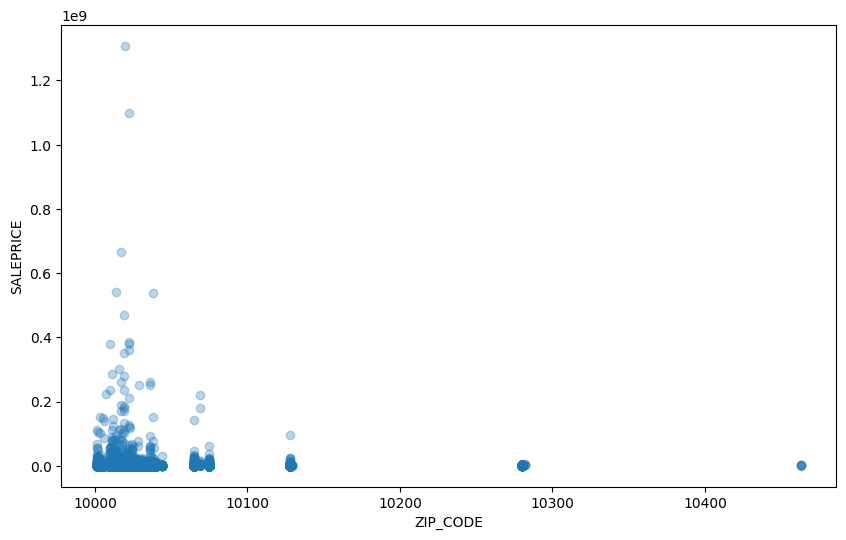

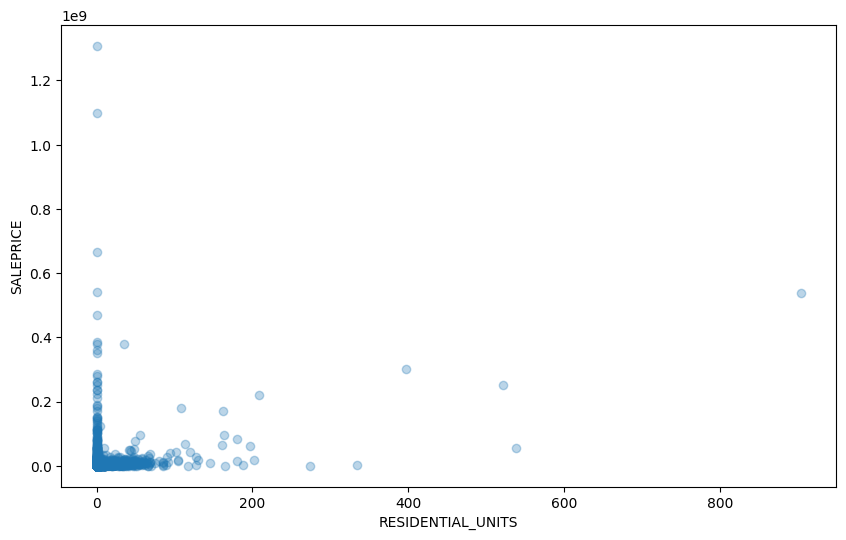

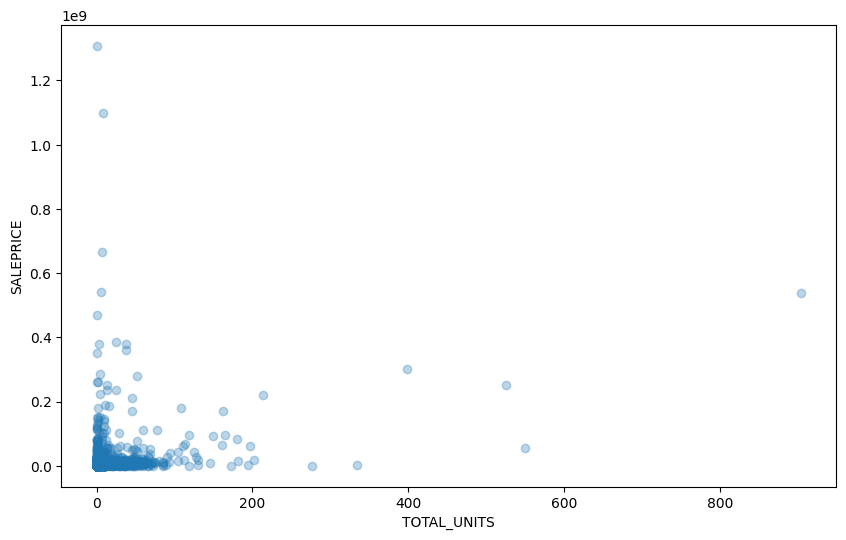

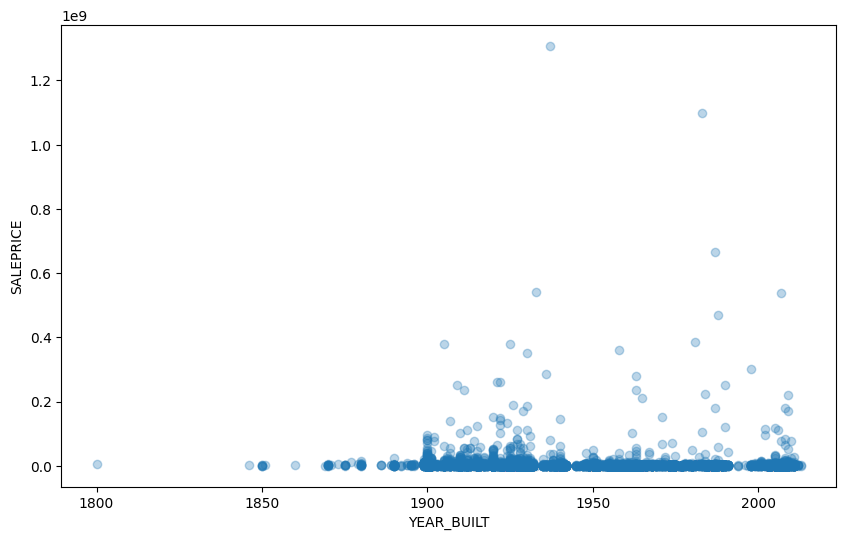

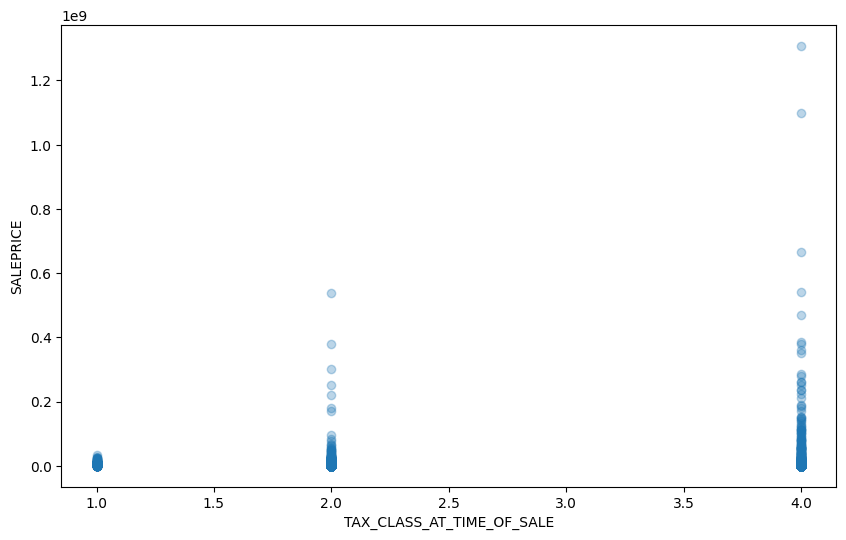

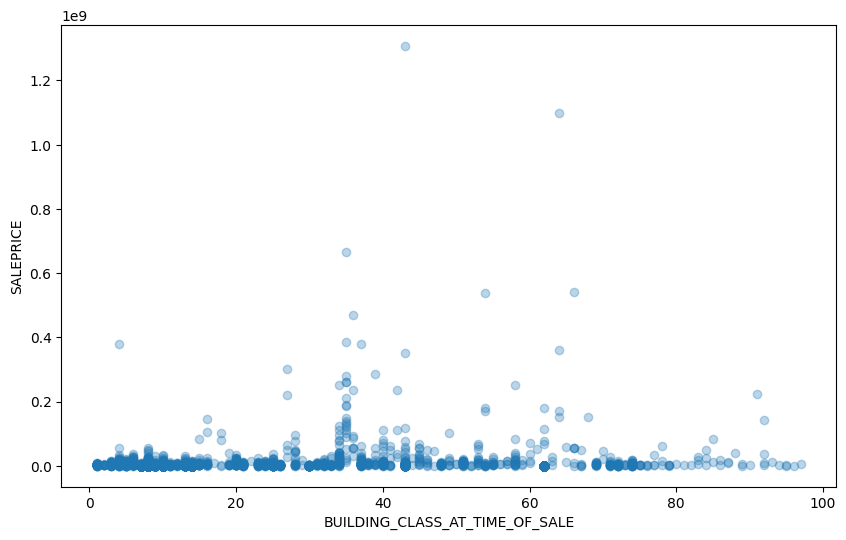

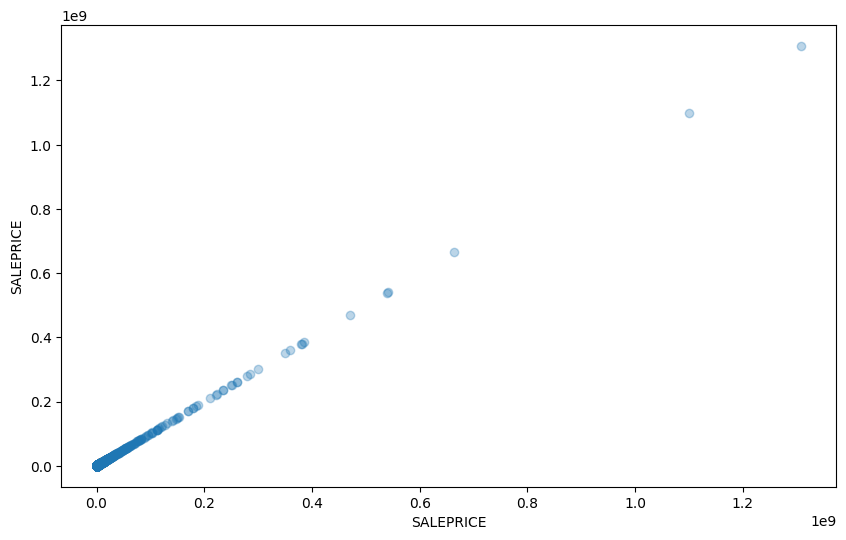

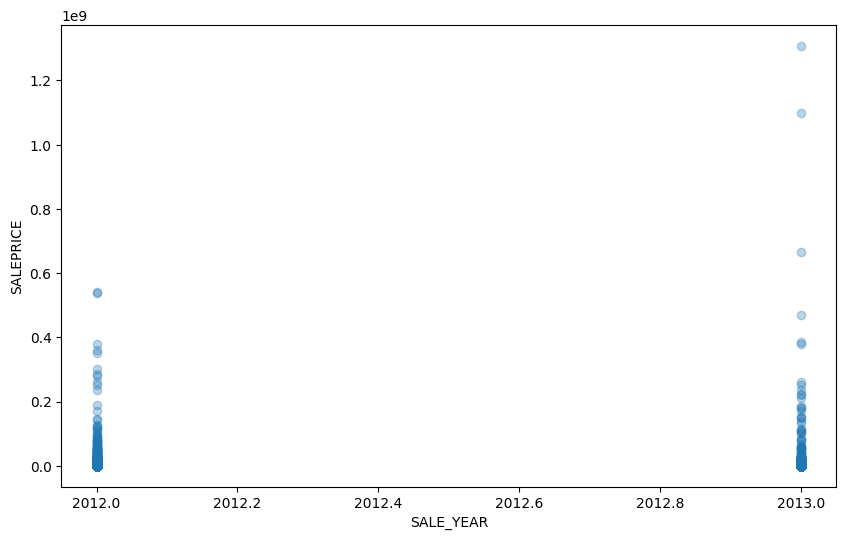

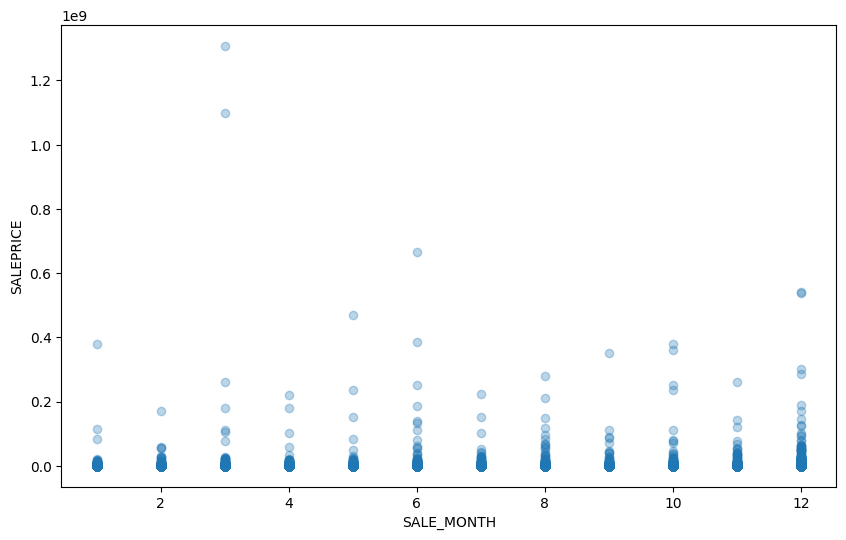

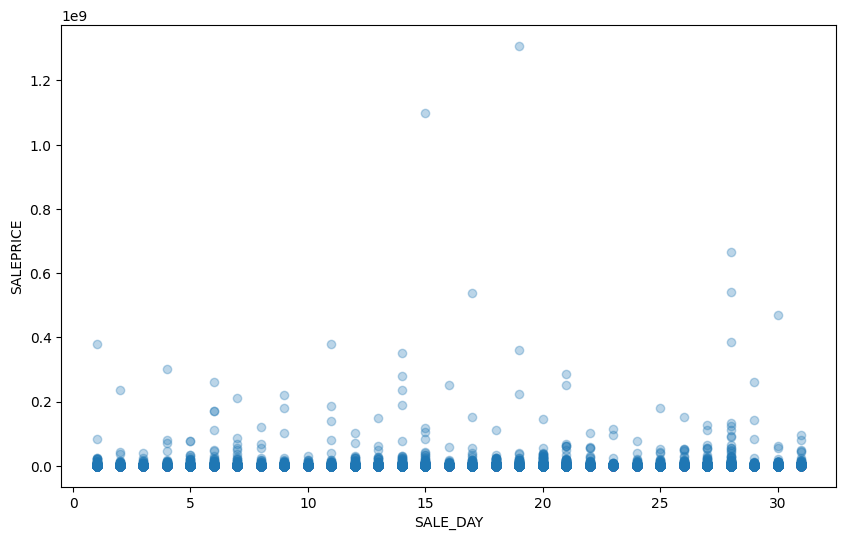

In [39]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.regplot(x=col, y='SALEPRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})

> <h3>Based on the above boxplot and scatter plot against SALEPRICE dealing with outliers</h3>

In [40]:
df = df[df['SALE_YEAR'] > 1800]
df = df[df['TOTAL_UNITS'] < 400]
df = df[df['RESIDENTIAL_UNITS'] < 400]
df = df[df['SALEPRICE'] < 500000000]
df = df[df['SALEPRICE'] > 100000]

In [41]:
df.shape

(14554, 16)

> #### Decided to drop the rows which have a feature with more than 3 or less than -3 standard deviation

In [42]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(np.abs(z_scores) < 3).all(axis=1)]

### Log of the Sale price and normalizing the data
> Let's see the skewness of each field

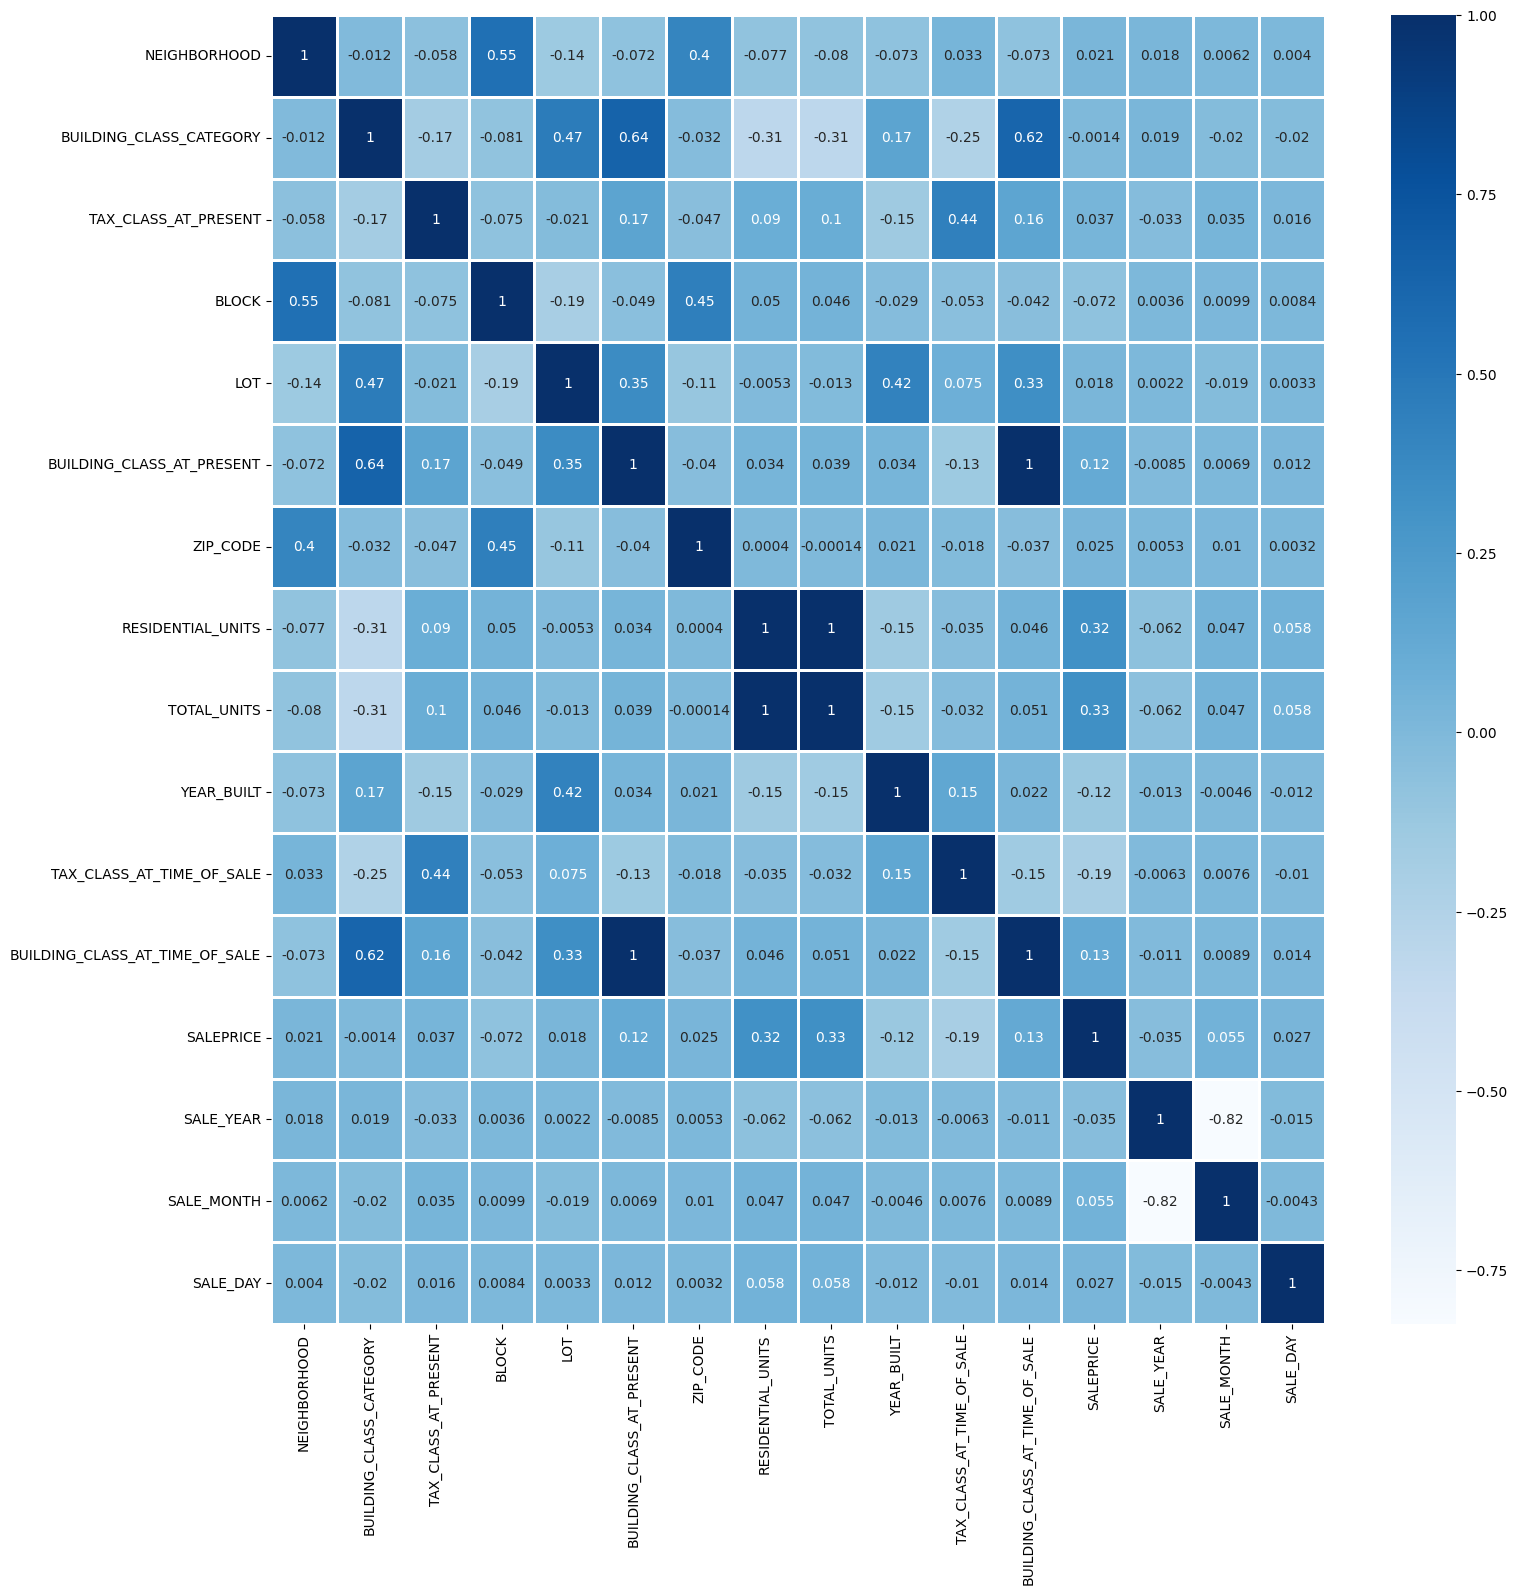

In [43]:
%matplotlib inline
corr = df.corr()
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(corr, cmap='Blues', annot=True, linewidths=2, ax=ax)
plt.show()

In [44]:
df.skew()

NEIGHBORHOOD                     -0.588688
BUILDING_CLASS_CATEGORY           2.031911
TAX_CLASS_AT_PRESENT              2.476961
BLOCK                            -0.227990
LOT                               0.721465
BUILDING_CLASS_AT_PRESENT         3.218095
ZIP_CODE                          2.442671
RESIDENTIAL_UNITS                 5.928102
TOTAL_UNITS                       5.890311
YEAR_BUILT                        0.327272
TAX_CLASS_AT_TIME_OF_SALE        -8.416370
BUILDING_CLASS_AT_TIME_OF_SALE    3.393997
SALEPRICE                         5.751896
SALE_YEAR                        -0.342946
SALE_MONTH                       -0.061779
SALE_DAY                         -0.037333
dtype: float64

> #### Log transforming certain classes

In [45]:
# df.RESIDENTIAL_UNITS = np.log(df.RESIDENTIAL_UNITS)
# df.TOTAL_UNITS = np.log(df.TOTAL_UNITS)
df.BUILDING_CLASS_AT_TIME_OF_SALE = np.log(df.BUILDING_CLASS_AT_TIME_OF_SALE)
df.TAX_CLASS_AT_TIME_OF_SALE = np.log(df.TAX_CLASS_AT_TIME_OF_SALE)
df.SALEPRICE = np.log(df.SALEPRICE)
# df.SALEPRICE = np.log(df.SALEPRICE)

<h1 style="color: Red;">Data Visualization:</h1>

> Aggressive cleaning of dataset for data visualization

In [46]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [47]:
dt = pd.read_csv('Manhattan12.csv')


In [48]:
dt.shape

(27399, 21)

### Rename incorrectly formatted column names

In [49]:
# Remove Top 4 rows of description
Df = dt[4:-1]
Df.columns = dt.iloc[3]
Df.reset_index(drop=True, inplace = True)
# Removing ' ', '\n' 
updated_column_names = []
for column in Df.columns:
    column = column.replace(" ", "_").replace("\n","").replace("\r","")
    updated_column_names.append(column)
Df.columns = updated_column_names
print(Df.columns)

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENTNUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALEPRICE', 'SALE_DATE'],
      dtype='object')


### Dropping the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'

In [50]:
Df = Df.drop(['BOROUGH', 'EASE-MENT', 'APARTMENTNUMBER'], axis=1)

### For each numerical column, remove the , the 'dollar' for the sale price, and then convert them to numeric.

In [51]:
num_columns = ['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALEPRICE', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE']
cat_columns = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'BUILDING_CLASS_AT_TIME_OF_SALE']
for column in num_columns:
    Df[column] = Df[column].replace('[\$,]', '', regex=True).astype(float)
    
Df[num_columns] = Df[num_columns].astype(float)

### Create list of categorical variables and another for the numerical variables¶

In [52]:
cat_list = list(Df.select_dtypes(include=['object']).columns)
num_list = list(Df.select_dtypes(include=['int', 'float']).columns)


### Convert SALE DATE to datetime datatype¶

In [53]:
Df.SALE_DATE = pd.to_datetime(Df['SALE_DATE'], format='%d/%m/%Y')
print(Df['SALE_DATE'].dtype)

datetime64[ns]


### For each categorical variable, remove the spaces, and then replace the empty string '' by NaN

In [54]:
Df[cat_list] = Df[cat_list].applymap(lambda x: x.strip() if isinstance(x, str) else x)
Df[cat_list] = Df[cat_list].replace('', pd.NA)

### Replace the zeros in Prices, Land squares, etc. by NaN

In [55]:
Df[num_columns] = Df[num_columns].replace(0, pd.NA)

### Show a summary of all missing values as well as the summary statistics

In [56]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27394 entries, 0 to 27393
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    27377 non-null  object        
 1   BUILDING_CLASS_CATEGORY         23940 non-null  object        
 2   TAX_CLASS_AT_PRESENT            27251 non-null  object        
 3   BLOCK                           27394 non-null  float64       
 4   LOT                             27394 non-null  float64       
 5   BUILDING_CLASS_AT_PRESENT       27251 non-null  object        
 6   ADDRESS                         27394 non-null  object        
 7   ZIP_CODE                        27393 non-null  object        
 8   RESIDENTIAL_UNITS               11023 non-null  object        
 9   COMMERCIAL_UNITS                3433 non-null   object        
 10  TOTAL_UNITS                     17691 non-null  object        
 11  LA

In [57]:
Df.describe()

,BLOCK,LOT,TAX_CLASS_AT_TIME_OF_SALE
count,27394.000000,27394.000000,27394.000000
mean,1109.627656,741.813390,2.488063
std,465.958098,819.427506,0.891692
min,7.000000,1.000000,1.000000
25%,877.000000,37.000000,2.000000
50%,1047.000000,1007.000000,2.000000
75%,1411.000000,1233.000000,4.000000
max,2250.000000,9117.000000,4.000000


### dropping duplicates

In [58]:
Df.drop_duplicates(inplace=True)
Df.shape


(25801, 18)

### dropping rows with NaN

In [59]:
Df.dropna(inplace=True)
Df.shape

(470, 18)

### identify and remove outliers if any and showing shape

In [60]:
z_scores = np.abs(stats.zscore(Df.select_dtypes(include=np.number)))
Df = Df[(z_scores < 3).all(axis=1)]
Df.shape

(467, 18)

### Consider the log of the prices and normalise the data

In [61]:
Df['SALEPRICE'] = np.log(Df['SALEPRICE'].astype('float64'))

### Creating Neighborhood vs Price scatter plot visualization

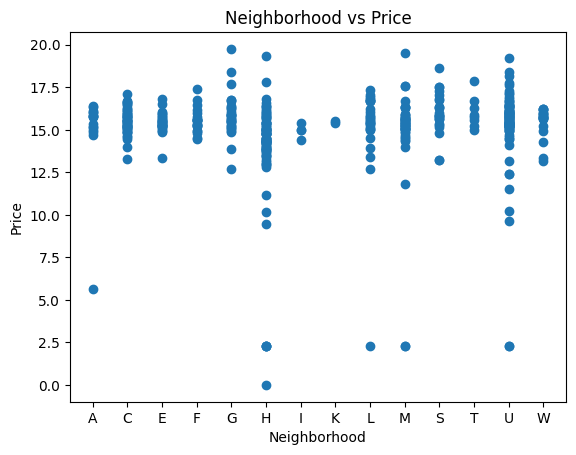

<Figure size 1500x1500 with 0 Axes>

In [62]:
short_names = {}
for value in Df['NEIGHBORHOOD'].unique():
    short_name = value[0]
    short_names[value] = short_name

Df['NEIGHBORHOOD'] = Df['NEIGHBORHOOD'].replace(short_names)
plt.scatter(Df['NEIGHBORHOOD'], Df['SALEPRICE'])
plt.title('Neighborhood vs Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.figure(figsize=(15,15))
plt.show()

### Creating SALE PRICE vs SALE DATE visualization

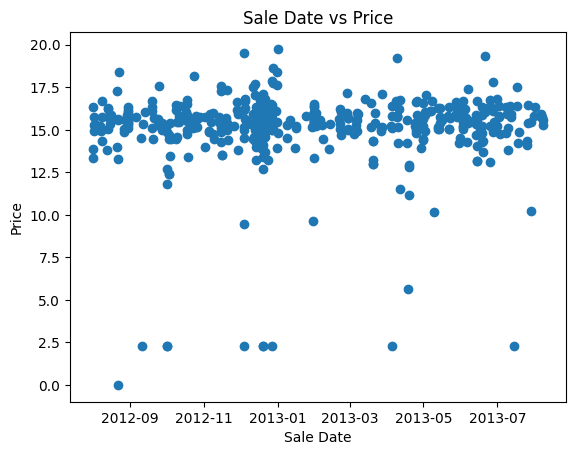

<Figure size 1500x1500 with 0 Axes>

In [63]:
plt.scatter(Df['SALE_DATE'], Df['SALEPRICE'])
plt.title('Sale Date vs Price')
plt.xlabel('Sale Date')
plt.ylabel('Price')
plt.figure(figsize=(15,15))
plt.show()

## Feature Selection:

In [64]:
corr['SALEPRICE'].sort_values(ascending=False)

SALEPRICE                         1.000000
TOTAL_UNITS                       0.328682
RESIDENTIAL_UNITS                 0.320627
BUILDING_CLASS_AT_TIME_OF_SALE    0.127382
BUILDING_CLASS_AT_PRESENT         0.120491
SALE_MONTH                        0.055145
TAX_CLASS_AT_PRESENT              0.037194
SALE_DAY                          0.026734
ZIP_CODE                          0.024530
NEIGHBORHOOD                      0.020580
LOT                               0.017591
BUILDING_CLASS_CATEGORY          -0.001361
SALE_YEAR                        -0.034747
BLOCK                            -0.072036
YEAR_BUILT                       -0.124511
TAX_CLASS_AT_TIME_OF_SALE        -0.190622
Name: SALEPRICE, dtype: float64

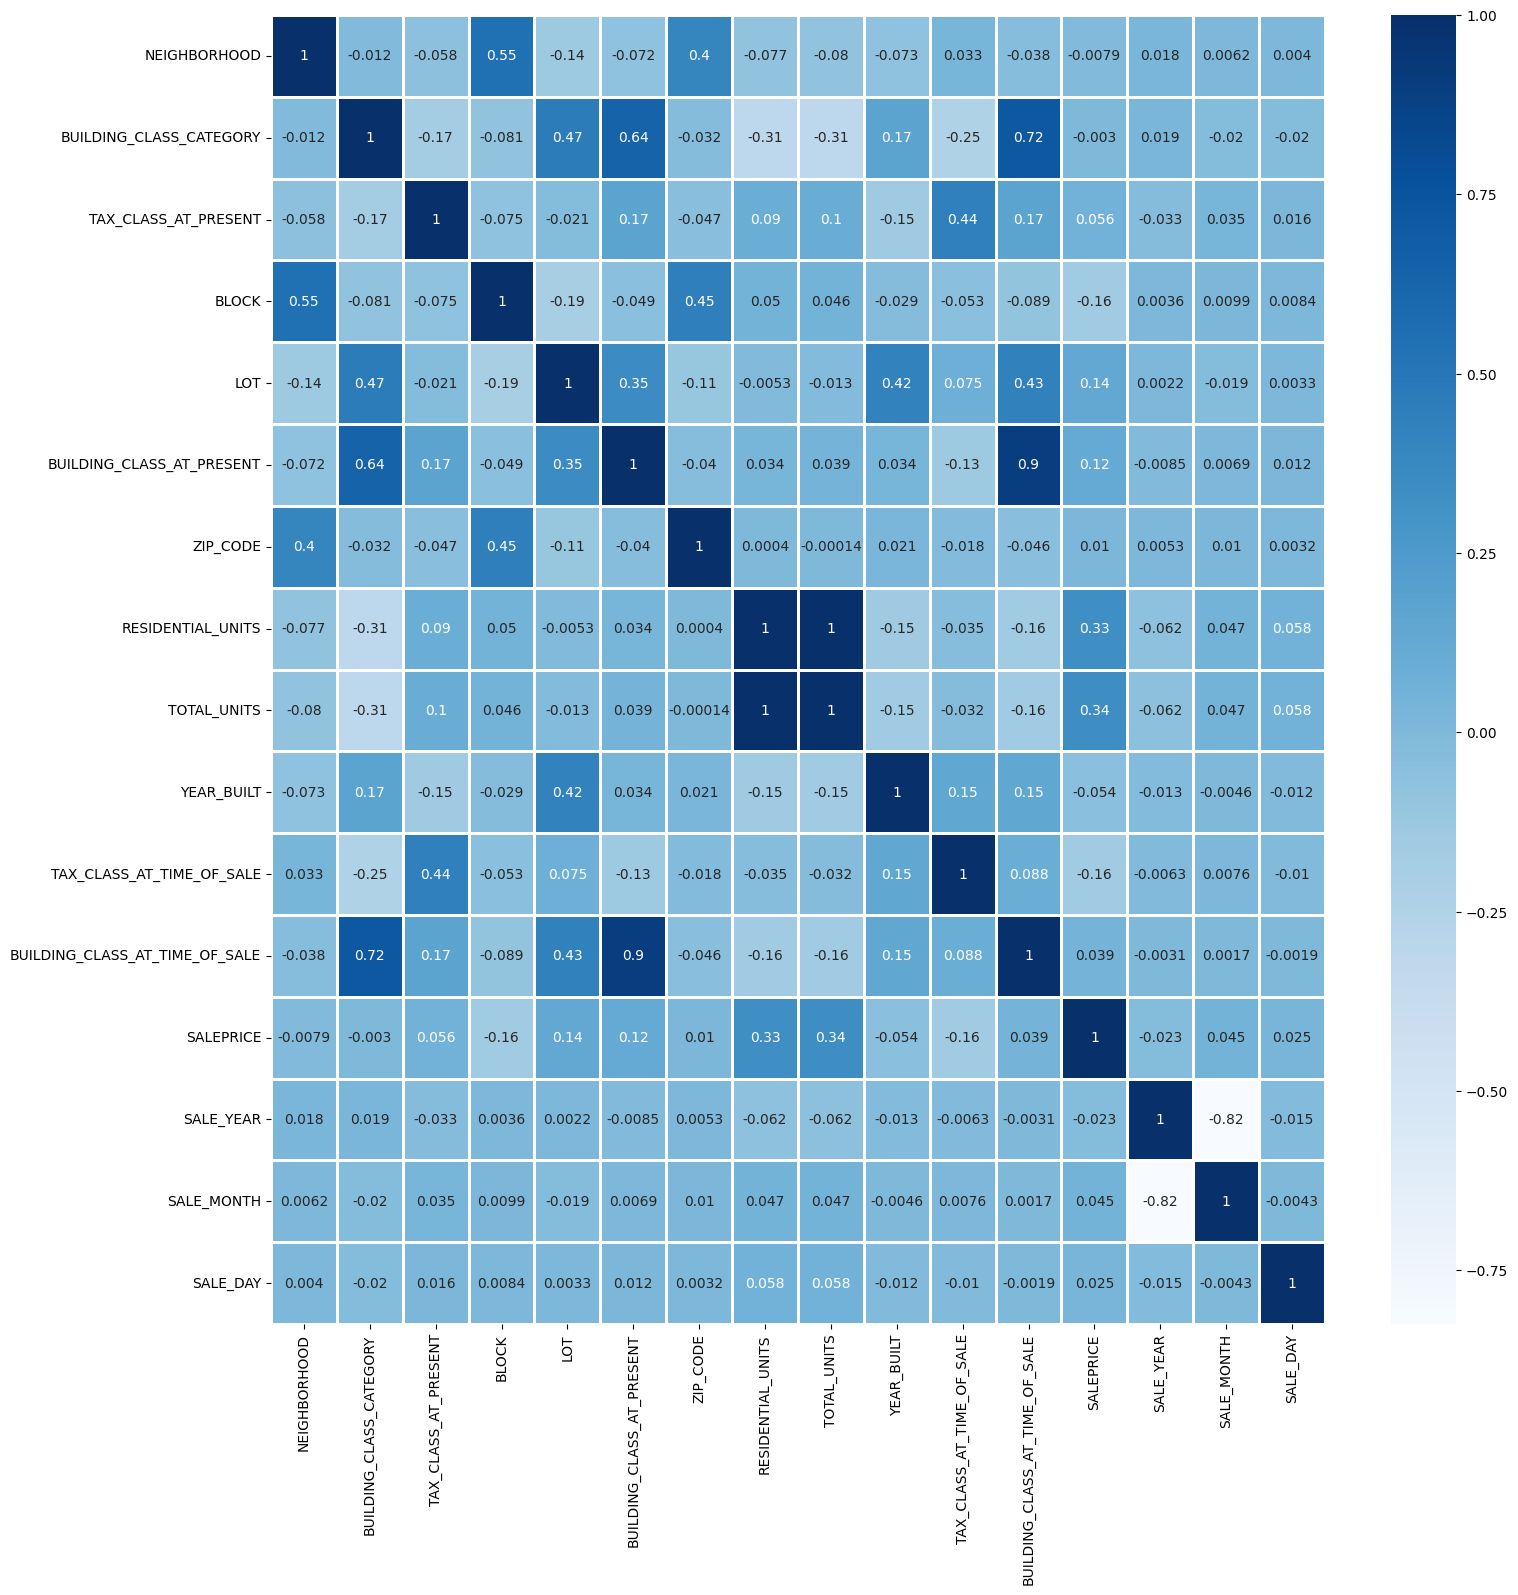

In [65]:
%matplotlib inline
corr = df.corr()
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(corr, cmap='Blues', annot=True, linewidths=2, ax=ax)
plt.show()

> Selecting feature with good pearson's correlation

In [66]:
modelData = df.drop(['SALE_MONTH', 'SALE_DAY', 'ZIP_CODE'], axis = 1)
modelData.reset_index(inplace=True, drop=True)

In [67]:
modelData.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,RESIDENTIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALEPRICE,SALE_YEAR
0,1,1,1,377.0,66.0,1,3.0,3.0,1899.0,0.000000,0.000000,14.962913,2013
1,1,2,2,399.0,1102.0,2,1.0,1.0,1955.0,0.000000,0.693147,15.053885,2013
2,1,3,3,375.0,62.0,3,20.0,20.0,1900.0,0.693147,1.098612,15.110238,2012
3,1,3,3,376.0,30.0,3,13.0,13.0,1910.0,0.693147,1.098612,13.704858,2012
4,1,3,3,391.0,55.0,3,17.0,17.0,1900.0,0.693147,1.098612,15.068274,2012


In [68]:
modelData.shape

(13285, 13)

<h1 style="color: Red;"> Linear predictive model:</h1>

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression model training
def buildModel(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    clf = LinearRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))
    print("Coefficients: \n", clf.coef_)
    print("r-squared:", r2_score(y_test, y_pred))

In [70]:
y = modelData.SALEPRICE
X = modelData.drop(['SALEPRICE'], axis=1)

buildModel(X,y)

Root mean squared error: 0.8814898043335943
Coefficients: 
 [ 1.52962276e-02 -6.08610708e-02  1.80564987e-01 -4.43667540e-04
  2.28321371e-04 -5.69676768e-02 -2.07231113e-01  3.00158518e-01
 -2.66237606e-04 -3.50771238e+00  8.63075674e-01  1.14115907e-03]
r-squared: 0.2407809502066316


<h1 style="color: Red;">Clustering and Linear model on the clusters:</h1>

### We are clustering the data and one of the cluster will represent a property being transferred

> ### Finding number of clusters using elbow method

In [71]:
test_size = 0.3  # 30% of the data is used for testing 
train_data = modelData[:-int(test_size*len(modelData))]  #training data
test_data =  modelData[-int(test_size*len(modelData)):]  #testing data

In [72]:
from sklearn.cluster import KMeans
def elbow(data):
    print("\nPlotting elbow method...")
    sse = {}
    for k in range(2, 20, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(modelData)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_  
        # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()
    print("DONE")


Plotting elbow method...
2 3574174772.1977587


c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 1386973717.9385438
6 793315109.6114079


c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 537327957.834441
10 389378407.2836398


c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12 301034600.70690113


c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14 250308922.1859986


c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16 205894780.43858835


c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18 173901698.767197


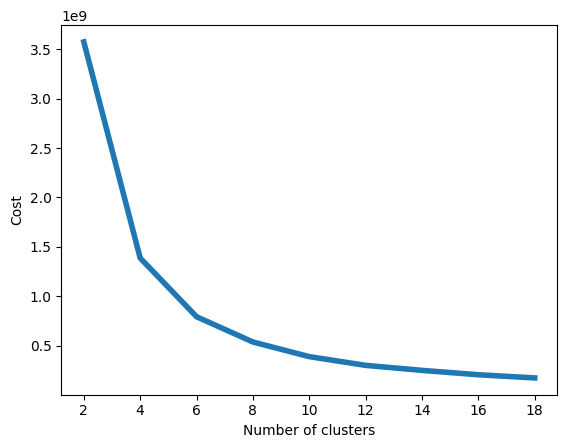

DONE


In [73]:
elbow(train_data)

In [74]:
kmeans = KMeans(n_clusters=4).fit(train_data)

c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


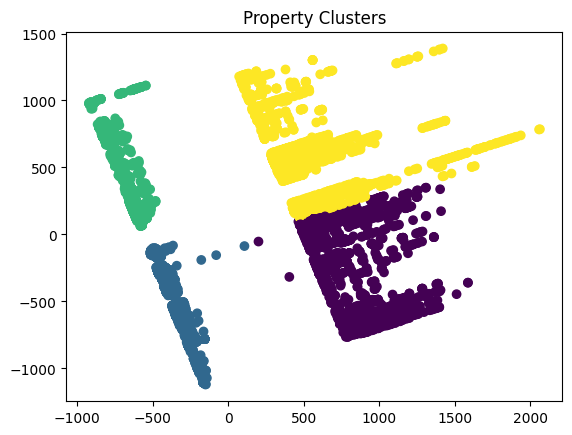

In [75]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit(train_data)
pca_2d = pca_data.transform(train_data)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=kmeans.labels_)
plt.title('Property Clusters')
plt.show()

In [76]:
train_data["CLUSTER"] = cluster_labels

NameError: name 'cluster_labels' is not defined

In [ ]:
train_data.head()

> ### Plotting the generated Clusters by reducing the dimensions

In [ ]:
cluster_groups = {}
for label, group in train_data.groupby('CLUSTER'):
    group.drop(["CLUSTER"], axis=1, inplace=True)
    cluster_groups[label] = group

In [ ]:
for key, value in cluster_groups.items():
    print(value.shape)

In [ ]:
def build_and_return_linear_model(X, y):
    clf = LinearRegression()
    clf.fit(X,y)
    return clf

linear_cluster_models = {}
for key, value in cluster_groups.items():
    X = value.drop(['SALEPRICE'], axis=1)
    y = value.SALEPRICE
    linear_cluster_models[key] = build_and_return_linear_model(X, y)

In [ ]:
linear_cluster_models

In [ ]:
kmeans.cluster_centers_

In [ ]:
model

In [ ]:
y_pred = kmeans.fit_predict(test_data)
test_data["CLUSTER"] = y_pred

In [ ]:
test_data

In [ ]:
np.unique(y_pred)

In [ ]:
predicted_cluster_groups = {}
for label, group in test_data.groupby('CLUSTER'):
    group.drop(["CLUSTER"], axis=1, inplace=True)
    predicted_cluster_groups[label] = group
    
    clf = linear_cluster_models.get(label)
    X_test = group.drop(["SALEPRICE"], axis=1)
    y_test = group.SALEPRICE
    y_pred = clf.predict(X_test)
    print("Cluster: ", label)
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))
    print("Coefficients: \n", clf.coef_)
    print("r-squared:", r2_score(y_test, y_pred))
    print("________________________________________")